# Title of notebook

Brief 1-2 sentence description of notebook.

In [1]:
import random

In [2]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# importing random forest classifier from assemble module 
from sklearn.ensemble import RandomForestClassifier 


In [7]:
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
from sklearn.decomposition import PCA



In [10]:
from sklearn.decomposition import FastICA
import numpy as np

from sklearn.decomposition import PCA

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
def get_significance_stars_from_p_value(p_value, number_of_comparisons=3):
    """
    """
    if p_value <= 0.001 / number_of_comparisons:
        return "***"
    elif p_value <= 0.01 / number_of_comparisons:
        return "***"
    elif p_value <= 0.05 / number_of_comparisons:
        return "*"
    else:
        return ""

## Inputs & Data

Explanation of each input and where it comes from.

In [13]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [14]:
font = {'weight' : 'medium',
        'size'   : 20}

matplotlib.rc('font', **font)

In [15]:
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [16]:
BAND_TO_COLOR = {"theta": "#FFAF00", "beta": "blue", "gamma": "#15616F"}
["#FFAF00", "#15616F"]

['#FFAF00', '#15616F']

In [17]:
OUTCOME_TO_COLOR = {'lose': "#951a1d",
 'omission': "#af780d",
 'rewarded': "#0499af",
 'win': "#3853a3",
'lose_comp': "#951a1d",
 'win_comp': "#3853a3",
'lose_non_comp': "#e67073",
 'win_non_comp': "#93a5da"}

In [18]:
MEASURE_TO_PATTERN = {"granger": "o", "coherence": "x", "power": ""}

In [19]:
GROUPING = "trial_outcome"
# GROUPING = "competition_closeness"

In [20]:
OUTCOME_LABELS = ["win", "lose", "rewarded"]
# OUTCOME_LABELS = ['win_non_comp', 'lose_non_comp', 'lose_comp', 'win_comp', 'rewarded']
# OUTCOME_LABELS = ['win_non_comp', 'lose_non_comp', 'lose_comp', 'win_comp']

# OUTCOME_LABELS = ['lose_non_comp', 'win_comp']

In [21]:
granger_df = pd.read_pickle("./proc/per_trial_granger.pkl")

In [22]:
power_df = pd.read_pickle("./proc/rce_sleap_and_power.pkl")

In [23]:
coherence_df = pd.read_pickle("./proc/rce_sleap_and_coherence.pkl")

In [24]:
granger_df.shape

(278, 126)

In [25]:
coherence_df.shape

(275, 128)

In [26]:
power_df.shape

(278, 161)

In [27]:
ALL_BANDS = ["theta", "beta", "gamma"]
BAND_TO_FREQ = {"theta": {"low_freq": 6, "high_freq": 11}, "beta": {"low_freq": 20, "high_freq": 31}, "gamma": {"low_freq": 30, "high_freq": 51}}
BAND_TO_FREQ = {"theta": (6,11), "beta": (20,31), "gamma": (30,51)}


In [28]:
merge_columns = ["time", "recording_file", "current_subject", "video_number"]
# Find columns in df2 that are not in merge_columns and also exist in df1, then drop them from df2
cols_to_drop = [col for col in power_df.columns if col not in merge_columns and col in coherence_df.columns]
coherence_df = coherence_df.drop(columns=cols_to_drop)
cols_to_drop = [col for col in power_df.columns if col not in merge_columns and col in granger_df.columns]
granger_df = granger_df.drop(columns=cols_to_drop)


In [29]:
power_df.columns

Index(['time', 'recording_file', 'video_number', 'current_subject',
       'mPFC_baseline_lfp_trace', 'mPFC_trial_lfp_trace',
       'mPFC_baseline-trial_lfp_trace', 'vHPC_baseline_lfp_trace',
       'vHPC_trial_lfp_trace', 'vHPC_baseline-trial_lfp_trace',
       ...
       'mPFC_baseline_power_window-averaged-velocity-parsed',
       'vHPC_baseline_power_window-averaged-velocity-parsed',
       'BLA_baseline_power_window-averaged-velocity-parsed',
       'LH_baseline_power_window-averaged-velocity-parsed',
       'MD_baseline_power_window-averaged-velocity-parsed',
       'mPFC_trial_power_window-averaged-velocity-parsed',
       'vHPC_trial_power_window-averaged-velocity-parsed',
       'BLA_trial_power_window-averaged-velocity-parsed',
       'LH_trial_power_window-averaged-velocity-parsed',
       'MD_trial_power_window-averaged-velocity-parsed'],
      dtype='object', length=161)

In [30]:
power_col = [col for col in power_df.columns if "power_window-averaged-velocity-parsed" in col]

In [31]:
power_df = power_df.dropna(subset=power_col).reset_index(drop=True)

In [32]:
for col in power_col:
    region_1 = col.split("_")[0]
    
    for band, (low_freq, high_freq) in BAND_TO_FREQ.items():
        region_band_column = "{}_{}_band_power".format(region_1, band)
        power_df[region_band_column] = power_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))

In [33]:
granger_col = [col for col in granger_df.columns if "window_mean_granger" in col]

In [34]:
BAND_TO_FREQ

{'theta': (6, 11), 'beta': (20, 31), 'gamma': (30, 51)}

In [35]:
for col in granger_col:
    region_1 = col.split("_")[0]
    region_2 = col.split("_")[1]
    
    for band, (low_freq, high_freq) in BAND_TO_FREQ.items():
        region_band_column = "{}_{}_{}_band_granger".format(region_1, region_2, band)
        granger_df[region_band_column] = granger_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))

/tmp/ipykernel_1714489/202851467.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  granger_df[region_band_column] = granger_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))
/tmp/ipykernel_1714489/202851467.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  granger_df[region_band_column] = granger_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))
/tmp/ipykernel_1714489/202851467.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

In [36]:
MERGED_LFP_AND_SLEAP = pd.merge(left=power_df, right=coherence_df, on=merge_columns, how="inner")

In [37]:
MERGED_LFP_AND_SLEAP = pd.merge(left=MERGED_LFP_AND_SLEAP, right=granger_df, on=merge_columns, how="inner")

In [38]:
MERGED_LFP_AND_SLEAP

time                                     recording_file  \
0    30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
1    32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
2    34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
3    35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
4    37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
..        ...                                                ...   
265  65281838  20230621_111240_standard_comp_to_omission_D5_s...   
266  66781856  20230621_111240_standard_comp_to_omission_D5_s...   
267  68781880  20230621_111240_standard_comp_to_omission_D5_s...   
268  70681909  20230621_111240_standard_comp_to_omission_D5_s...   
269  71681918  20230621_111240_standard_comp_to_omission_D5_s...   

     video_number current_subject  \
0             1.0             6.1   
1             1.0             6.1   
2             1.0             6.1   
3             1.0             6.1   
4             1.0             6.1   
..            ...             ...   
265           1.0             1.4   
266           1.0             1.4   
267           1.0             1.4   
268           1.0             1.4   
269           1.0             1.4   

                               mPFC_baseline_lfp_trace  \
0    [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1    [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2    [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3    [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4    [-3.6210587, -2.9530544, -2.4342163, -2.574735...   
..                                                 ...   
265  [0.25026315, -0.0152599495, 0.03967587, 0.0122...   
266  [0.42422658, 0.38760272, 0.28383505, 0.0427278...   
267  [0.64702183, 0.027467908, -0.6317619, -1.02852...   
268  [-2.685751, -3.0641978, -4.092718, -4.0042105,...   
269  [-0.64091784, -0.17091143, 0.42727858, 0.37539...   

                                  mPFC_trial_lfp_trace  \
0    [0.50154364, 0.29617018, 0.22050627, 0.1145767...   
1    [0.31995025, 0.16429879, 0.010809131, 0.067016...   
2    [-0.13835686, 0.42804158, 0.5945022, 0.3134648...   
3    [-0.32211208, 0.023780087, 0.13835686, -0.1102...   
4    [-2.9508927, -2.998453, -2.3282866, -2.0104983...   
..                                                 ...   
265  [-2.2889924, -2.2004848, -1.4741111, -1.010208...   
266  [-2.426332, -2.2187965, -1.6297625, -1.0193646...   
267  [-1.815934, -1.4191753, -1.1017684, -0.4028626...   
268  [0.042727858, 0.22279526, 0.2655231, -0.326562...   
269  [-0.054935817, 0.5096823, 0.9369609, 1.0346246...   

                         mPFC_baseline-trial_lfp_trace  \
0    [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1    [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2    [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3    [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4    [-3.6210587, -2.9530544, -2.4342163, -2.574735...   
..                                                 ...   
265  [0.25026315, -0.0152599495, 0.03967587, 0.0122...   
266  [0.42422658, 0.38760272, 0.28383505, 0.0427278...   
267  [0.64702183, 0.027467908, -0.6317619, -1.02852...   
268  [-2.685751, -3.0641978, -4.092718, -4.0042105,...   
269  [-0.64091784, -0.17091143, 0.42727858, 0.37539...   

                               vHPC_baseline_lfp_trace  \
0    [0.2583401, -0.26769176, -0.8311303, -1.046219...   
1    [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...   
2    [-1.0017985, -0.70955855, -0.7002069, -0.68033...   
3    [0.58447987, 0.4675839, 0.21275067, 0.03389983...   
4    [-1.4191171, -1.3793725, -1.1233703, -0.911788...   
..                                                 ...   
265  [-0.54008055, -0.7600229, -0.74047244, -0.6133...   
266  [-0.82844937, -0.7673543, -0.7062592, -0.71359...   
267  [-0.4374408, -0.3470201, -0.22971752, -0.22238...   
268  [0.75024766, 0.7820171, 0.73802865, 1.0141784,...   
269  [0.4276656, 0

In [39]:
MERGED_LFP_AND_SLEAP["recording_file"].unique()

array(['20221214_125409_om_and_comp_6_1_top_1_base_2_vs_6_3',
       '20221215_145401_comp_amd_om_6_1_top_4_base_3',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged',
       '20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged',
       '20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged',
       '20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged',
       '20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged'],
      dtype=object)

In [40]:
MERGED_LFP_AND_SLEAP.groupby(["time", "trial_outcome", "current_subject"]).count()

recording_file  video_number  \
time     trial_outcome current_subject                                 
1934930  lose          1.1                           1             1   
         win           1.4                           1             1   
4334936  lose          1.4                           1             1   
         win           1.1                           1             1   
4509412  lose          1.1                           1             1   
...                                                ...           ...   
68781880 rewarded      1.4                           1             1   
69560954 rewarded      1.1                           1             1   
                       1.2                           1             1   
70681909 omission      1.4                           1             1   
71681918 rewarded      1.4                           1             1   

                                        mPFC_baseline_lfp_trace  \
time     trial_outcome current_subject                            
1934930  lose          1.1                                    1   
         win           1.4                                    1   
4334936  lose          1.4                                    1   
         win           1.1                                    1   
4509412  lose          1.1                                    1   
...                                                         ...   
68781880 rewarded      1.4                                    1   
69560954 rewarded      1.1                                    1   
                       1.2                                    1   
70681909 omission      1.4                                    1   
71681918 rewarded      1.4                                    1   

                                        mPFC_trial_lfp_trace  \
time     trial_outcome current_subject                         
1934930  lose          1.1                                 1   
         win           1.4                                 1   
4334936  lose          1.4                                 1   
         win           1.1                                 1   
4509412  lose          1.1                                 1   
...                                                      ...   
68781880 rewarded      1.4                                 1   
69560954 rewarded      1.1                                 1   
                       1.2                                 1   
70681909 omission      1.4                                 1   
71681918 rewarded      1.4                                 1   

                                        mPFC_baseline-trial_lfp_trace  \
time     trial_outcome current_subject                                  
1934930  lose          1.1                                          1   
         win           1.4                                          1   
4334936  lose          1.4                                          1   
         win           1.1                                          1   
4509412  lose          1.1                                          1   
...                                                               ...   
68781880 rewarded      1.4                                          1   
69560954 rewarded      1.1                                          1   
                       1.2                                          1   
70681909 omission      1.4                                          1   
71681918 rewarded      1.4                                          1   

                                        vHPC_baseline_lfp_trace  \
time     trial_outcome current_subject                            
1934930  lose          1.1                                    1   
         win           1.4                                    1   
4334936  lose          1.4                                    1   
         win           1.1                                    1   
4509412  lose          1.1                    

In [41]:
MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["trial_outcome"] == "lose"].shape

(79, 362)

In [42]:
MERGED_LFP_AND_SLEAP["recording_dir"].unique()

array(['20221214_125409_om_and_comp_6_1_and_6_3',
       '20221215_145401_comp_amd_om_6_1_and_6_3',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-1_and_1-2',
       '20230618_100636_standard_comp_to_omission_D2_subj_1-4_and_1-1',
       '20230619_115321_standard_comp_to_omission_D3_subj_1-2_and_1-4',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-2_and_1-1',
       '20230621_111240_standard_comp_to_omission_D5_subj_1-4_and_1-2'],
      dtype=object)

In [43]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP if "band" in col and "beta" not in col]

In [44]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.dropna(subset=feature_columns)

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions 

In [45]:
def get_region_network(row, columns, low_index=0, high_index=1):
    directed_graph = nx.DiGraph()
    for col in columns:
        region_1 = col.split("_")[0]
        region_2 = col.split("_")[1]
        directed_graph.add_edge(region_1, region_2, weight=np.mean(row[col][low_index:high_index]))
    return directed_graph

In [46]:
def generate_pairs(lst):
    pairs = []
    n = len(lst)
    for i in range(n):
        for j in range(i+1, n):
            pairs.append((lst[i], lst[j]))
    return pairs

# Part 1. Making predictions of winning vs losing based on power

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [47]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [48]:
ALL_BANDS = ["theta", "beta", "gamma"]
# BAND_TO_FREQ = {"theta": {"low_freq": 4, "high_freq": 12}, "beta": {"low_freq": 13, "high_freq": 30}, "gamma": {"low_freq": 30, "high_freq": 70}}
# BAND_TO_FREQ = {"theta": {"low_freq": 6, "high_freq": 11}, "gamma": {"low_freq": 30, "high_freq": 51}}
BAND_TO_FREQ = {"theta": (6, 11), "gamma": (30, 51)}

- Filtering for powers that are from low velocity parts of the trial

In [49]:
MERGED_LFP_AND_SLEAP.head()

time                                     recording_file  video_number  \
0  30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
1  32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
2  34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
3  35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
4  37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   

  current_subject                            mPFC_baseline_lfp_trace  \
0             6.1  [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1             6.1  [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2             6.1  [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3             6.1  [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4             6.1  [-3.6210587, -2.9530544, -2.4342163, -2.574735...   

                                mPFC_trial_lfp_trace  \
0  [0.50154364, 0.29617018, 0.22050627, 0.1145767...   
1  [0.31995025, 0.16429879, 0.010809131, 0.067016...   
2  [-0.13835686, 0.42804158, 0.5945022, 0.3134648...   
3  [-0.32211208, 0.023780087, 0.13835686, -0.1102...   
4  [-2.9508927, -2.998453, -2.3282866, -2.0104983...   

                       mPFC_baseline-trial_lfp_trace  \
0  [-0.3134648, -0.39993784, -0.8777014, -1.44193...   
1  [1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...   
2  [-0.22482991, 0.3567013, 0.12538591, -0.136195...   
3  [0.4864109, 0.18591705, 0.397776, 0.24212453, ...   
4  [-3.6210587, -2.9530544, -2.4342163, -2.574735...   

                             vHPC_baseline_lfp_trace  \
0  [0.2583401, -0.26769176, -0.8311303, -1.046219...   
1  [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...   
2  [-1.0017985, -0.70955855, -0.7002069, -0.68033...   
3  [0.58447987, 0.4675839, 0.21275067, 0.03389983...   
4  [-1.4191171, -1.3793725, -1.1233703, -0.911788...   

                                vHPC_trial_lfp_trace  \
0  [-1.1479185, -1.1806493, -1.1432426, -1.139735...   
1  [-1.0205019, -0.9152954, -0.9947847, -0.976081...   
2  [0.47109076, 0.34016728, 0.18352668, 0.174175,...   
3  [0.15780956, 0.047927346, -0.14728892, -0.3565...   
4  [-4.0457697, -4.2304654, -3.9113393, -3.448431...   

                       vHPC_baseline-trial_lfp_trace  ...  \
0  [0.2583401, -0.26769176, -0.8311303, -1.046219...  ...   
1  [1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...  ...   
2  [-1.0017985, -0.70955855, -0.7002069, -0.68033...  ...   
3  [0.58447987, 0.4675839, 0.21275067, 0.03389983...  ...   
4  [-1.4191171, -1.3793725, -1.1233703, -0.911788...  ...   

  MD_vHPC_gamma_band_granger vHPC_MD_theta_band_granger  \
0                   0.308700                   0.544461   
1                   0.296993                   0.424742   
2                   0.264659                   0.416857   
3                   0.336984                   0.406630   
4                   0.269036                   0.535375   

  vHPC_MD_beta_band_granger vHPC_MD_gamma_band_granger  \
0                  0.315053                   0.392972   
1                  0.464322                   0.484576   
2                  0.538528                   0.528551   
3                  0.523946                   0.504038   
4                  0.556873                   0.593945   

  mPFC_vHPC_theta_band_granger mPFC_vHPC_beta_band_granger  \
0                     0.241112                    0.322984   
1                     0.337904                    0.300037   
2                     0.379768                    0.296710   
3                     0.235804                    0.441383   
4                     0.419996                    0.330796   

  mPFC_vHPC_gamma_band_granger vHPC_mPFC_theta_band_granger  \
0                     0.305378                     0.488346   
1                     0.328714                     0.486609   
2                     0.271932                     0.515236   
3                     0.310826                   

In [50]:
for col in MERGED_LFP_AND_SLEAP.columns:
    print(col)

time
recording_file
video_number
current_subject
mPFC_baseline_lfp_trace
mPFC_trial_lfp_trace
mPFC_baseline-trial_lfp_trace
vHPC_baseline_lfp_trace
vHPC_trial_lfp_trace
vHPC_baseline-trial_lfp_trace
BLA_baseline_lfp_trace
BLA_trial_lfp_trace
BLA_baseline-trial_lfp_trace
LH_baseline_lfp_trace
LH_trial_lfp_trace
LH_baseline-trial_lfp_trace
MD_baseline_lfp_trace
MD_trial_lfp_trace
MD_baseline-trial_lfp_trace
recording_dir
time_stamp_index
video_file
video_frame
subject_info
competition_closeness
video_name
all_subjects
trial_outcome
lfp_index
baseline_lfp_timestamp_range
trial_lfp_timestamp_range
baseline_ephys_timestamp_range
trial_ephys_timestamp_range
baseline_videoframe_range
trial_videoframe_range
trial_number
Cohort
spike_interface_mPFC
spike_interface_vHPC
spike_interface_BLA
spike_interface_LH
spike_interface_MD
file_path
start_frame
stop_frame
individual_subj
all_subj
recording_name
track_names
subject_and_tracks_list
subject_id
agent_id
corner_path
corner_parts
bottom_width
top_

In [51]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "trace" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "frequencies" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "window" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "velocity" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "locations" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "trial" in col and "trial_outcome" != col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "baseline" in col], errors="ignore")



In [52]:
MERGED_LFP_AND_SLEAP.to_pickle("./proc/rce_sleap_and_spectral.pkl")

In [53]:
MERGED_LFP_AND_SLEAP

time                                     recording_file  \
0    30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
1    32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
2    34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
3    35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
4    37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
..        ...                                                ...   
265  65281838  20230621_111240_standard_comp_to_omission_D5_s...   
266  66781856  20230621_111240_standard_comp_to_omission_D5_s...   
267  68781880  20230621_111240_standard_comp_to_omission_D5_s...   
268  70681909  20230621_111240_standard_comp_to_omission_D5_s...   
269  71681918  20230621_111240_standard_comp_to_omission_D5_s...   

     video_number current_subject  \
0             1.0             6.1   
1             1.0             6.1   
2             1.0             6.1   
3             1.0             6.1   
4             1.0             6.1   
..            ...             ...   
265           1.0             1.4   
266           1.0             1.4   
267           1.0             1.4   
268           1.0             1.4   
269           1.0             1.4   

                                         recording_dir  time_stamp_index  \
0              20221214_125409_om_and_comp_6_1_and_6_3          27998597   
1              20221214_125409_om_and_comp_6_1_and_6_3          29598593   
2              20221214_125409_om_and_comp_6_1_and_6_3          31398591   
3              20221214_125409_om_and_comp_6_1_and_6_3          32998593   
4              20221214_125409_om_and_comp_6_1_and_6_3          34498591   
..                                                 ...               ...   
265  20230621_111240_standard_comp_to_omission_D5_s...          62088794   
266  20230621_111240_standard_comp_to_omission_D5_s...          63588812   
267  20230621_111240_standard_comp_to_omission_D5_s...          65588836   
268  20230621_111240_standard_comp_to_omission_D5_s...          67488865   
269  20230621_111240_standard_comp_to_omission_D5_s...          68488874   

                                            video_file  video_frame  \
0    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        28574   
1    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        30569   
2    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        32813   
3    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        34807   
4    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        36677   
..                                                 ...          ...   
265  20230621_111240_standard_comp_to_omission_D5_s...        62056   
266  20230621_111240_standard_comp_to_omission_D5_s...        63554   
267  20230621_111240_standard_comp_to_omission_D5_s...        65550   
268  20230621_111240_standard_comp_to_omission_D5_s...        67447   
269  20230621_111240_standard_comp_to_omission_D5_s...        68444   

                subject_info competition_closeness  ...  \
0    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
1    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
2    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
3    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
4    6_1_top_1_base_2_vs_6_3          win_non_comp  ...   
..                       ...                   ...  ...   
265           1-4_t3b3L_box1              rewarded  ...   
266           1-4_t3b3L_box1              rewarded  ...   
267           1-4_t3b3L_box1              rewarded  ...   
268           1-4_t3b3L_box1              omission  ...   
269           1-4_t3b3L_box1              rewarded  ...   

    MD_vHPC_gamma_band_granger vHPC_MD_theta_band_granger  \
0                     0.308700                   0.544461   
1                     0.296993                   0.424742   
2                     0.264659                   0.416857   
3                     0.3369

- Filtering out for trials that are win vs loss

In [55]:
network_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP[GROUPING].isin(OUTCOME_LABELS)]
# network_df = network_df[network_df["current_subject"].isin(["1.1"])]


In [61]:
network_df[feature_columns + ["trial_outcome", "current_subject"]].groupby(["trial_outcome", "current_subject"]).mean()

mPFC_theta_band_power  mPFC_gamma_band_power  \
trial_outcome current_subject                                                 
lose          1.1                           0.035014               0.002283   
              1.2                           0.033886               0.001419   
              1.4                           0.019663               0.002811   
              6.1                           0.018833               0.001493   
rewarded      1.1                           0.026074               0.001960   
              1.2                           0.016890               0.001050   
              1.4                           0.020093               0.002552   
win           1.1                           0.026591               0.001946   
              1.2                           0.025131               0.001263   
              1.4                           0.017934               0.002898   
              6.1                           0.028384               0.001509   

                               vHPC_theta_band_power  vHPC_gamma_band_power  \
trial_outcome current_subject                                                 
lose          1.1                           0.031110               0.003278   
              1.2                           0.028773               0.001829   
              1.4                           0.040573               0.004787   
              6.1                           0.030889               0.002016   
rewarded      1.1                           0.022192               0.002850   
              1.2                           0.036060               0.001284   
              1.4                           0.019695               0.002922   
win           1.1                           0.019165               0.002738   
              1.2                           0.020929               0.001716   
              1.4                           0.052544               0.006452   
              6.1                           0.030815               0.001631   

                               BLA_theta_band_power  BLA_gamma_band_power  \
trial_outcome current_subject                                               
lose          1.1                          0.039351              0.002608   
              1.2                          0.037059              0.002716   
              1.4                          0.020977              0.004621   
              6.1                          0.018324              0.004750   
rewarded      1.1                          0.026964              0.002526   
              1.2                          0.018754              0.002213   
              1.4                          0.014854              0.004043   
win           1.1                          0.027716              0.002404   
              1.2                          0.026998              0.002475   
              1.4                          0.022677              0.005157   
              6.1                          0.017172              0.002924   

                               LH_theta_band_power  LH_gamma_band_power  \
trial_outcome current_subject                                             
lose          1.1                         0.048926             0.001350   
              1.2                         0.049167             0.001946   
              1.4                         0.033234             0.001616   
              6.1                         0.018990             0.001259   
rewarded      1.1                         0.033382             0.001229   
              1.2                         0.022577             0.001339   
              1.4                         0.025866             0.001514   
win           1.1                         0.033760             0.001270   
              1.2                         0.036565             0.001662   
              1.4                         0.025727             0.001802   
              6.1                         0.025198             0.001219  

In [62]:
network_df[feature_columns + ["trial_outcome", "current_subject"]].groupby(["trial_outcome", "current_subject"]).sem()

mPFC_theta_band_power  mPFC_gamma_band_power  \
trial_outcome current_subject                                                 
lose          1.1                           0.003555               0.000086   
              1.2                           0.002849               0.000198   
              1.4                           0.000890               0.000069   
              6.1                           0.001854               0.000063   
rewarded      1.1                           0.001153               0.000045   
              1.2                           0.000665               0.000021   
              1.4                           0.001284               0.000138   
win           1.1                           0.001216               0.000033   
              1.2                           0.003164               0.000044   
              1.4                           0.001027               0.000072   
              6.1                           0.000690               0.000030   

                               vHPC_theta_band_power  vHPC_gamma_band_power  \
trial_outcome current_subject                                                 
lose          1.1                           0.003172               0.000162   
              1.2                           0.001642               0.000086   
              1.4                           0.002743               0.000351   
              6.1                           0.002430               0.000151   
rewarded      1.1                           0.001366               0.000085   
              1.2                           0.001712               0.000046   
              1.4                           0.001502               0.000135   
win           1.1                           0.000875               0.000049   
              1.2                           0.001161               0.000083   
              1.4                           0.008488               0.000802   
              6.1                           0.000873               0.000028   

                               BLA_theta_band_power  BLA_gamma_band_power  \
trial_outcome current_subject                                               
lose          1.1                          0.003445              0.000096   
              1.2                          0.003237              0.000255   
              1.4                          0.000899              0.000152   
              6.1                          0.001654              0.000245   
rewarded      1.1                          0.001417              0.000087   
              1.2                          0.000447              0.000049   
              1.4                          0.000830              0.000163   
win           1.1                          0.001337              0.000044   
              1.2                          0.001653              0.000154   
              1.4                          0.002738              0.000500   
              6.1                          0.000461              0.000154   

                               LH_theta_band_power  LH_gamma_band_power  \
trial_outcome current_subject                                             
lose          1.1                         0.004365             0.000047   
              1.2                         0.005434             0.000403   
              1.4                         0.001467             0.000049   
              6.1                         0.001033             0.000064   
rewarded      1.1                         0.001691             0.000033   
              1.2                         0.000952             0.000037   
              1.4                         0.001384             0.000055   
win           1.1                         0.001406             0.000027   
              1.2                         0.003877             0.000075   
              1.4                         0.002046             0.000105   
              6.1                         0.000952             0.000022  

In [63]:
spectral_features = ["power", "coherence", "granger"]
band_features = ["theta", "gamma"]

In [64]:
sub_feature_to_columns = {}

In [66]:
import itertools

In [67]:
for feature_1, feature_2 in itertools.product(band_features, spectral_features):
    sub_feature_to_columns["{} {} only".format(feature_1, feature_2)] = [col for col in feature_columns if feature_1 in col and feature_2 in col]

In [68]:
sub_feature_to_columns

{'theta power only': ['mPFC_theta_band_power',
  'vHPC_theta_band_power',
  'BLA_theta_band_power',
  'LH_theta_band_power',
  'MD_theta_band_power'],
 'theta coherence only': ['BLA_LH_theta_band_coherence',
  'BLA_MD_theta_band_coherence',
  'BLA_mPFC_theta_band_coherence',
  'BLA_vHPC_theta_band_coherence',
  'LH_MD_theta_band_coherence',
  'LH_mPFC_theta_band_coherence',
  'LH_vHPC_theta_band_coherence',
  'MD_mPFC_theta_band_coherence',
  'MD_vHPC_theta_band_coherence',
  'mPFC_vHPC_theta_band_coherence'],
 'theta granger only': ['BLA_LH_theta_band_granger',
  'LH_BLA_theta_band_granger',
  'BLA_MD_theta_band_granger',
  'MD_BLA_theta_band_granger',
  'BLA_mPFC_theta_band_granger',
  'mPFC_BLA_theta_band_granger',
  'BLA_vHPC_theta_band_granger',
  'vHPC_BLA_theta_band_granger',
  'LH_MD_theta_band_granger',
  'MD_LH_theta_band_granger',
  'LH_mPFC_theta_band_granger',
  'mPFC_LH_theta_band_granger',
  'LH_vHPC_theta_band_granger',
  'vHPC_LH_theta_band_granger',
  'MD_mPFC_theta_b

theta power only ['mPFC_theta_band_power', 'vHPC_theta_band_power', 'BLA_theta_band_power', 'LH_theta_band_power', 'MD_theta_band_power']


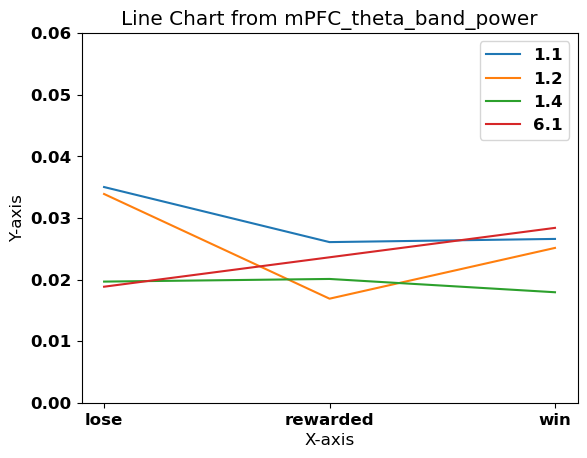

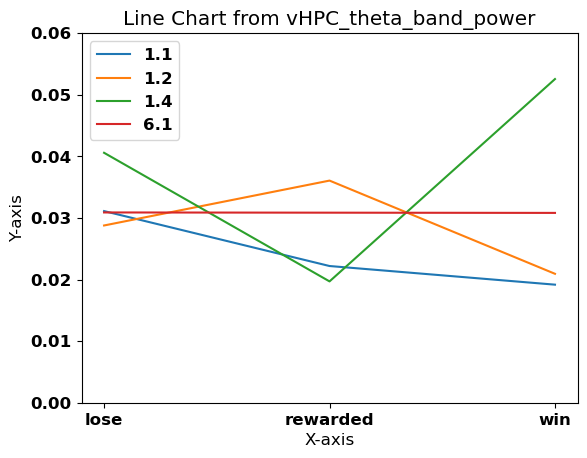

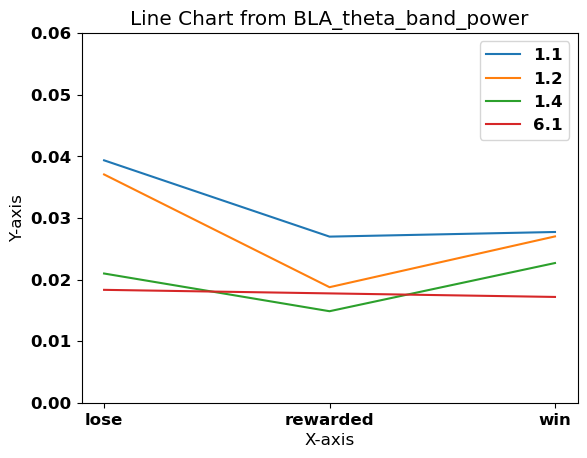

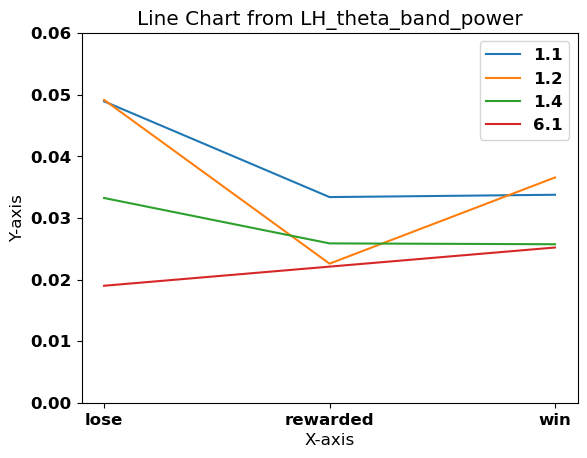

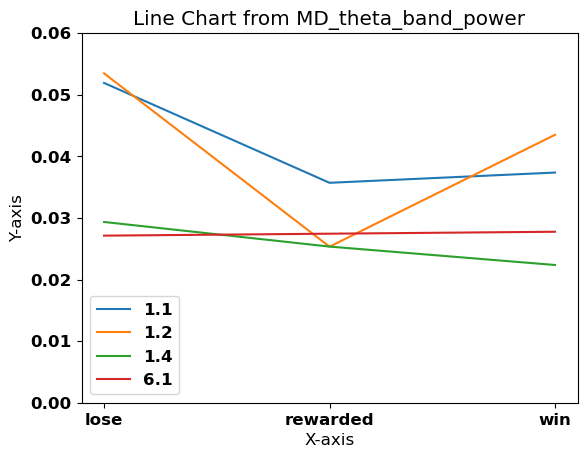

theta coherence only ['BLA_LH_theta_band_coherence', 'BLA_MD_theta_band_coherence', 'BLA_mPFC_theta_band_coherence', 'BLA_vHPC_theta_band_coherence', 'LH_MD_theta_band_coherence', 'LH_mPFC_theta_band_coherence', 'LH_vHPC_theta_band_coherence', 'MD_mPFC_theta_band_coherence', 'MD_vHPC_theta_band_coherence', 'mPFC_vHPC_theta_band_coherence']


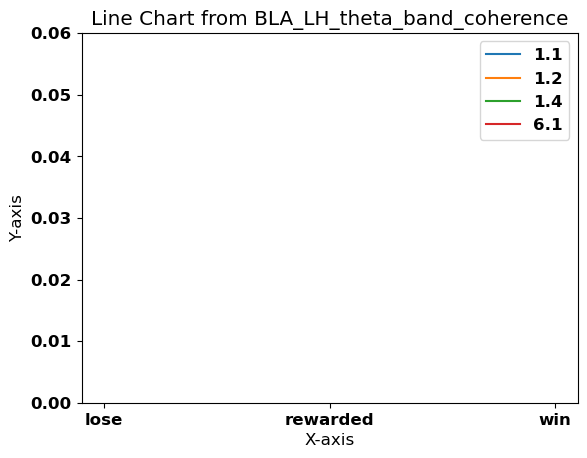

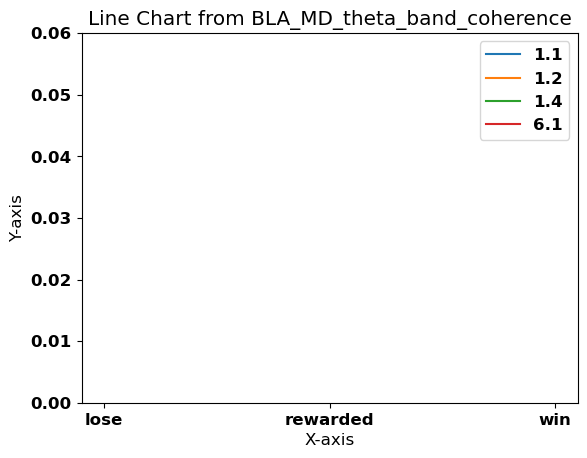

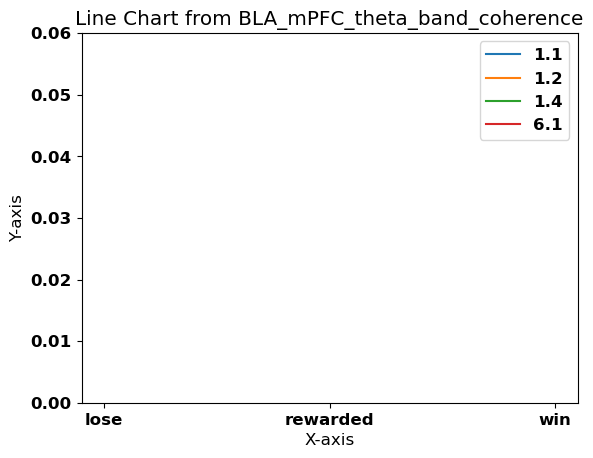

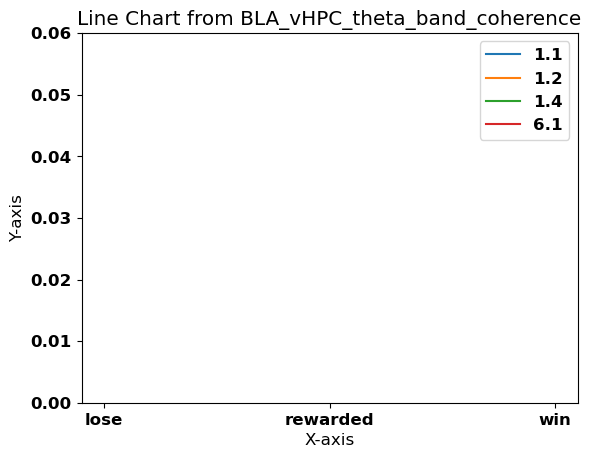

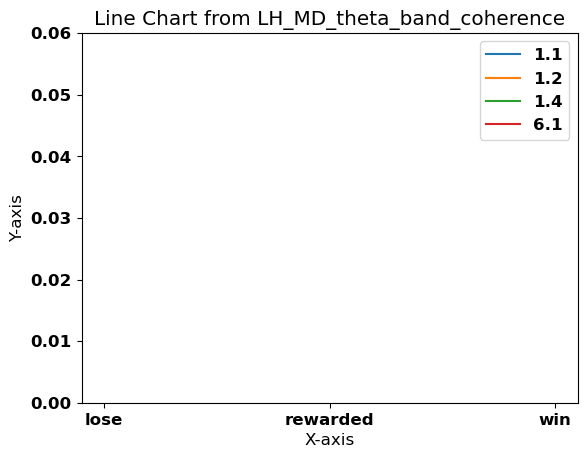

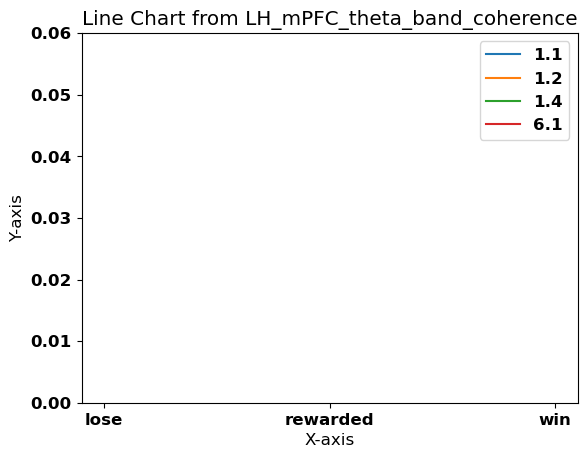

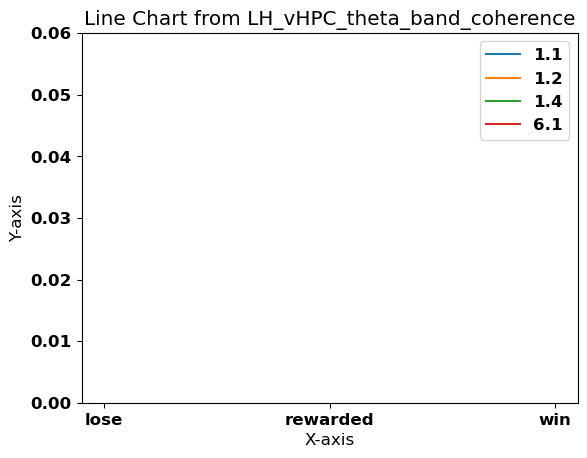

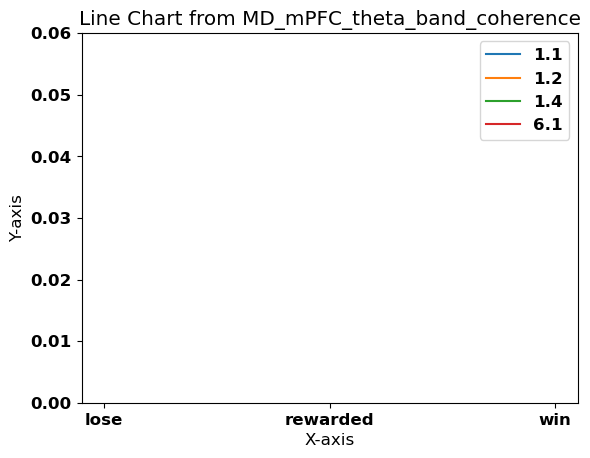

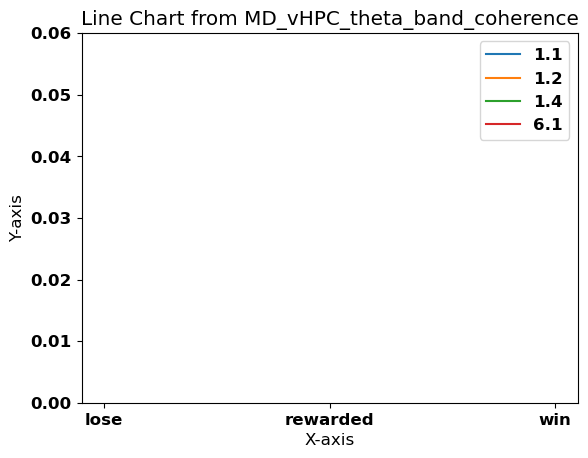

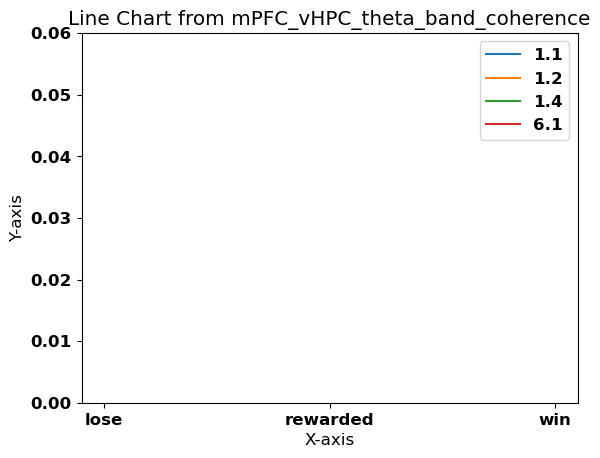

theta granger only ['BLA_LH_theta_band_granger', 'LH_BLA_theta_band_granger', 'BLA_MD_theta_band_granger', 'MD_BLA_theta_band_granger', 'BLA_mPFC_theta_band_granger', 'mPFC_BLA_theta_band_granger', 'BLA_vHPC_theta_band_granger', 'vHPC_BLA_theta_band_granger', 'LH_MD_theta_band_granger', 'MD_LH_theta_band_granger', 'LH_mPFC_theta_band_granger', 'mPFC_LH_theta_band_granger', 'LH_vHPC_theta_band_granger', 'vHPC_LH_theta_band_granger', 'MD_mPFC_theta_band_granger', 'mPFC_MD_theta_band_granger', 'MD_vHPC_theta_band_granger', 'vHPC_MD_theta_band_granger', 'mPFC_vHPC_theta_band_granger', 'vHPC_mPFC_theta_band_granger']


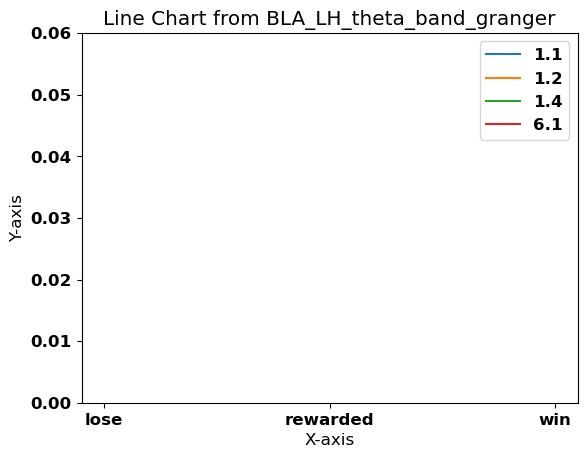

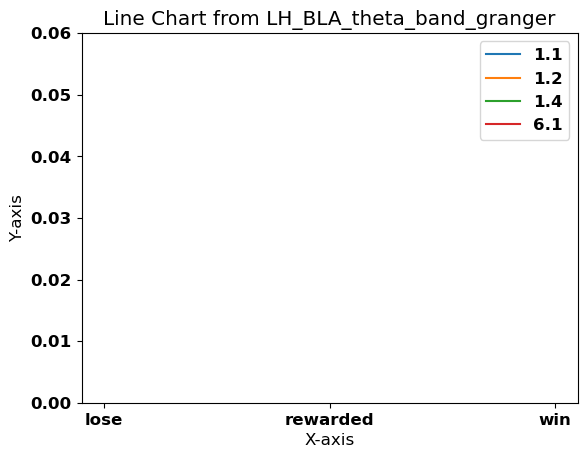

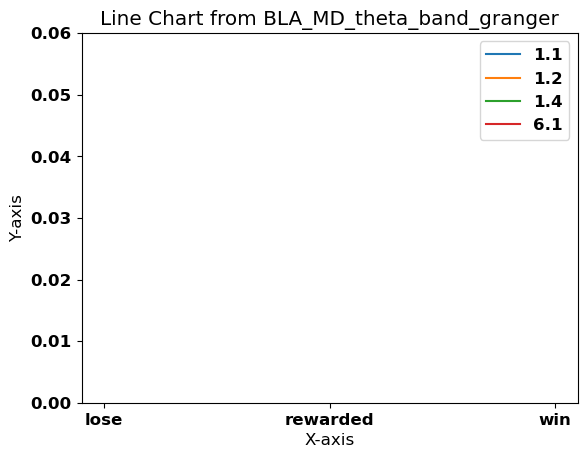

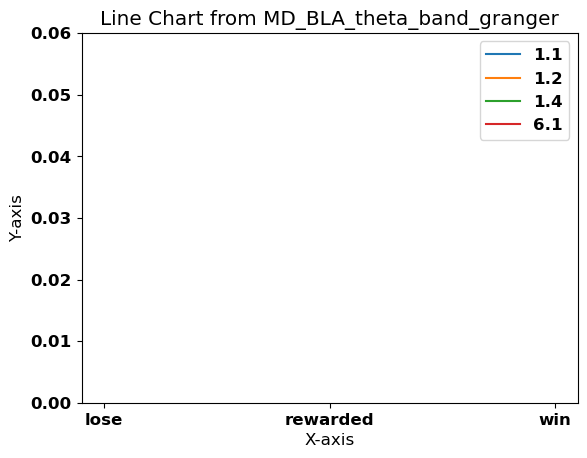

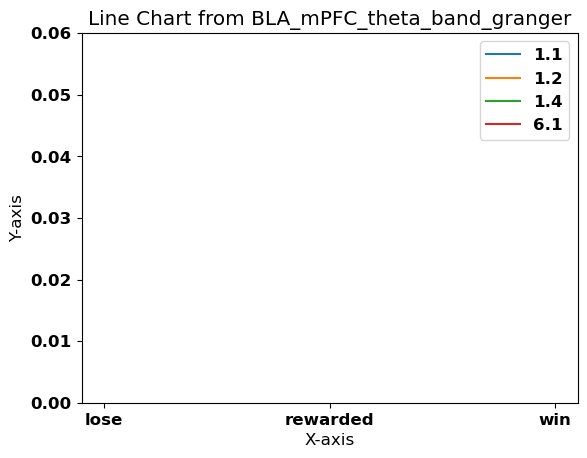

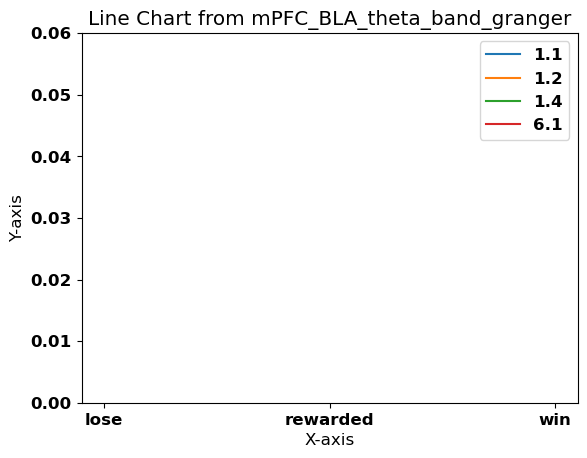

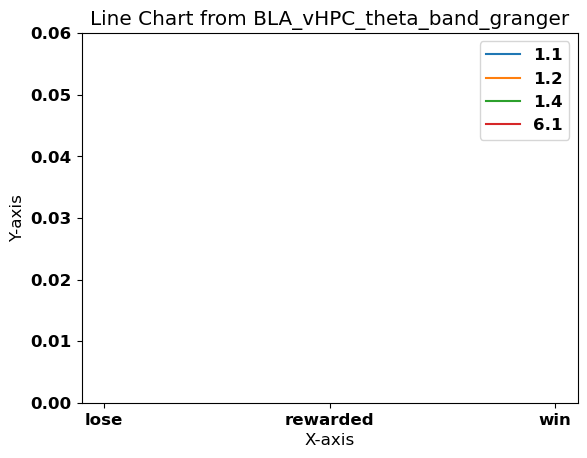

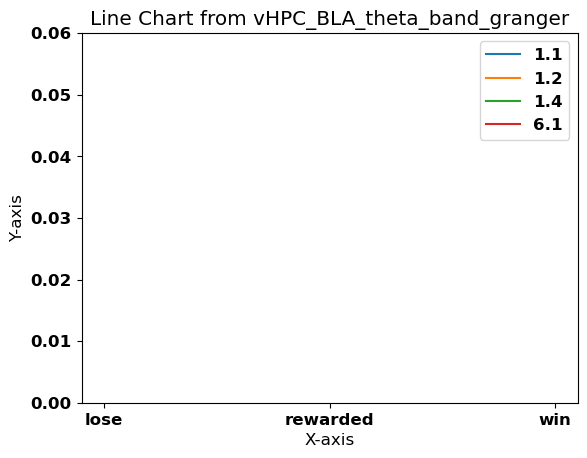

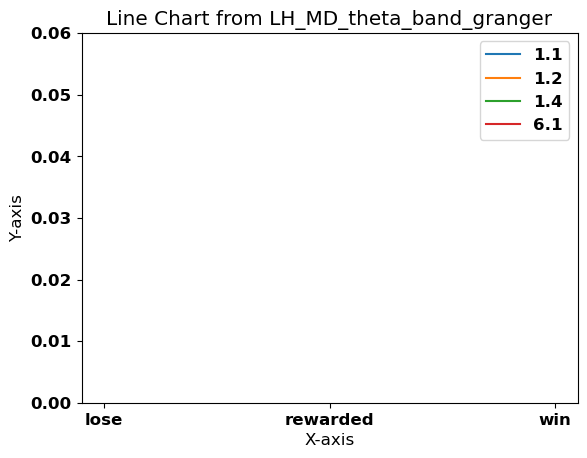

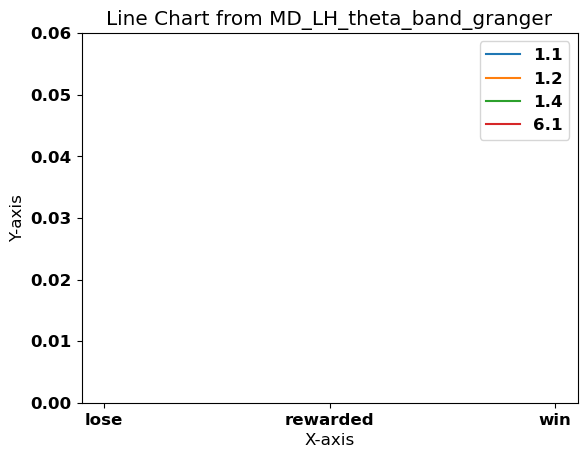

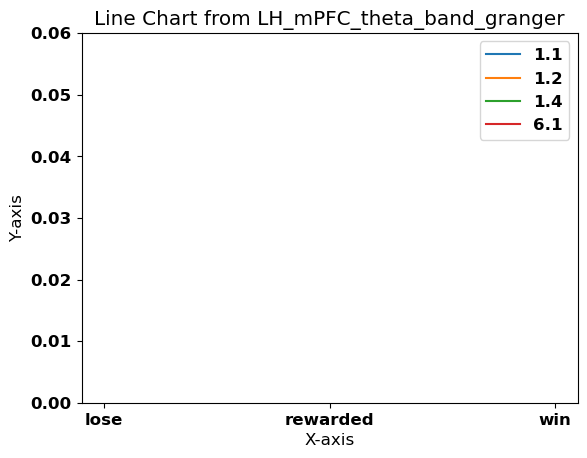

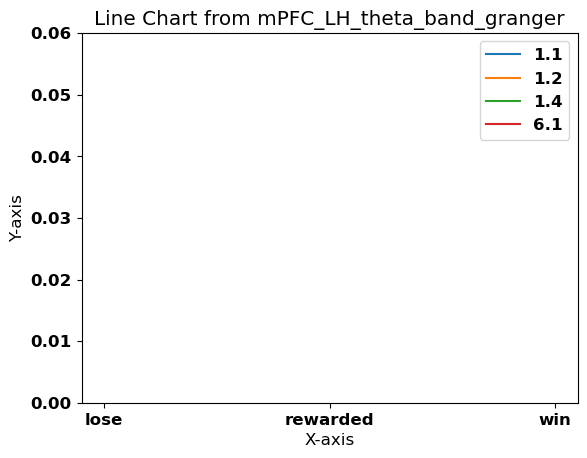

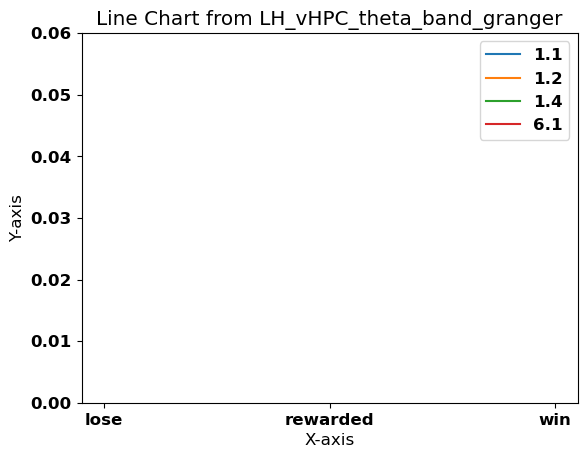

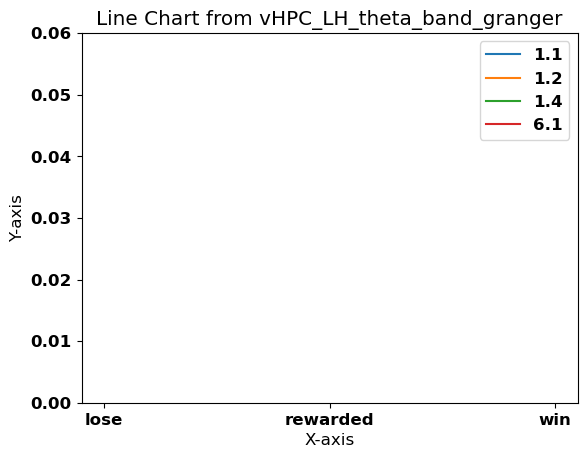

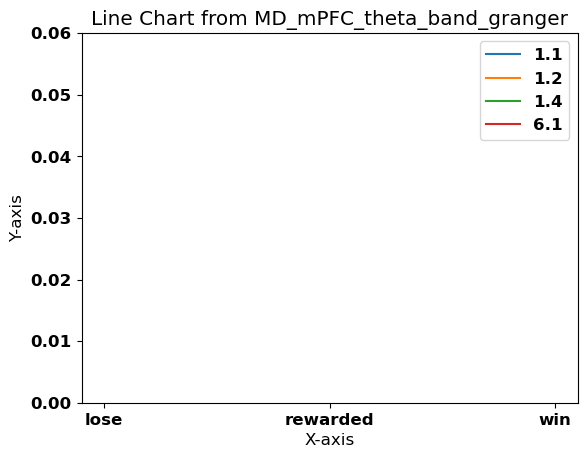

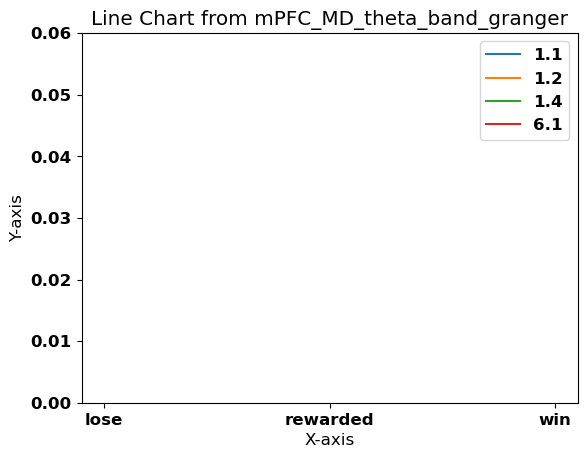

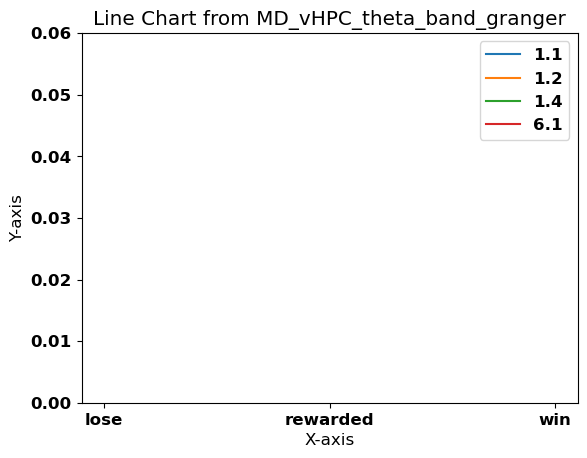

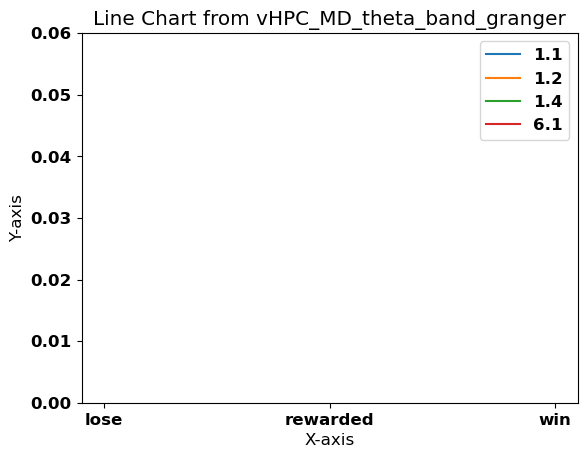

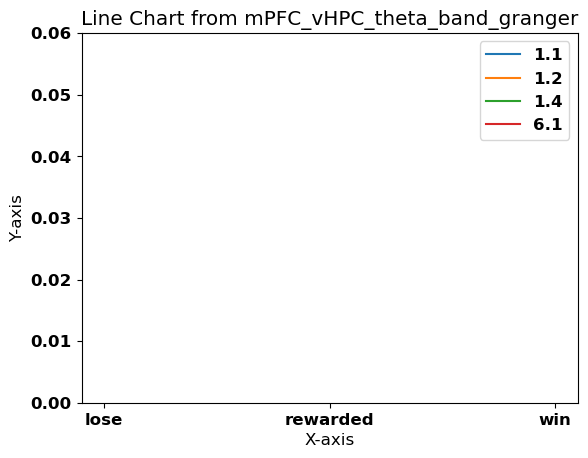

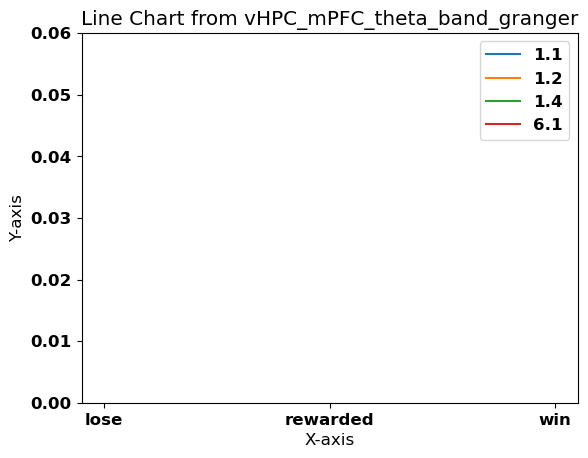

gamma power only ['mPFC_gamma_band_power', 'vHPC_gamma_band_power', 'BLA_gamma_band_power', 'LH_gamma_band_power', 'MD_gamma_band_power']


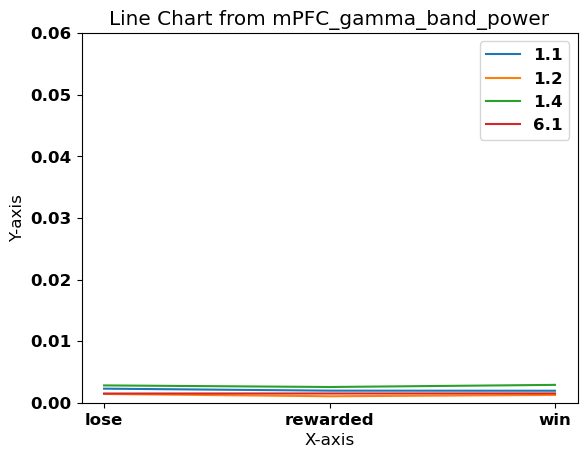

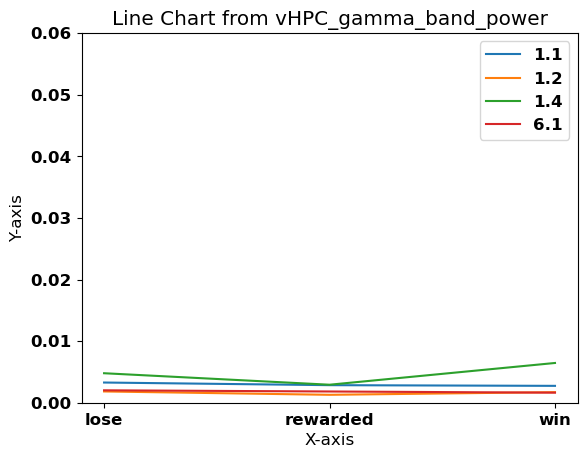

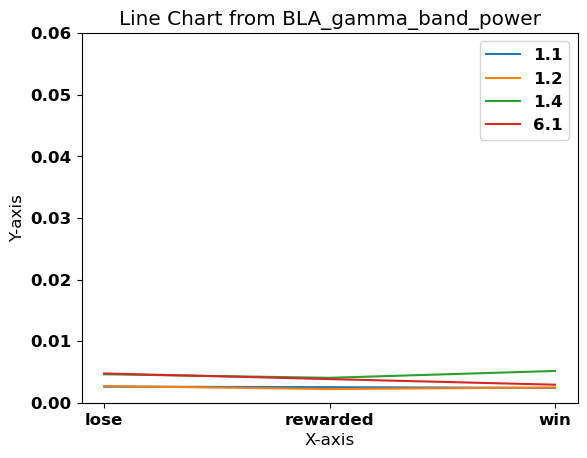

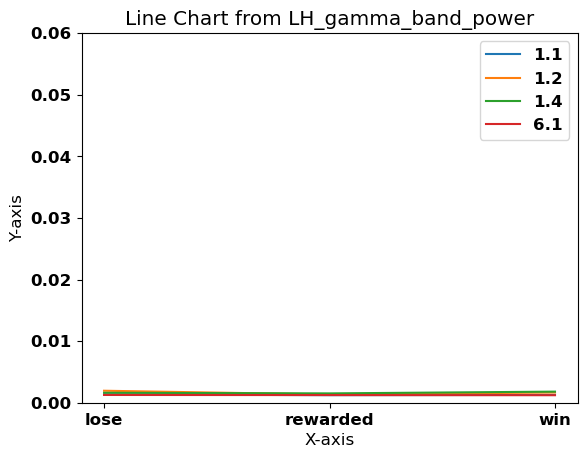

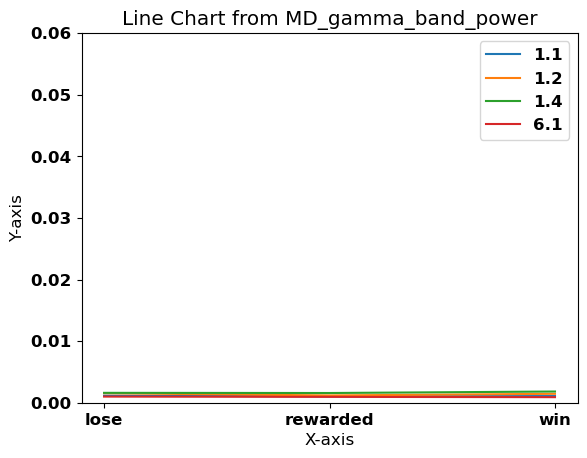

gamma coherence only ['BLA_LH_gamma_band_coherence', 'BLA_MD_gamma_band_coherence', 'BLA_mPFC_gamma_band_coherence', 'BLA_vHPC_gamma_band_coherence', 'LH_MD_gamma_band_coherence', 'LH_mPFC_gamma_band_coherence', 'LH_vHPC_gamma_band_coherence', 'MD_mPFC_gamma_band_coherence', 'MD_vHPC_gamma_band_coherence', 'mPFC_vHPC_gamma_band_coherence']


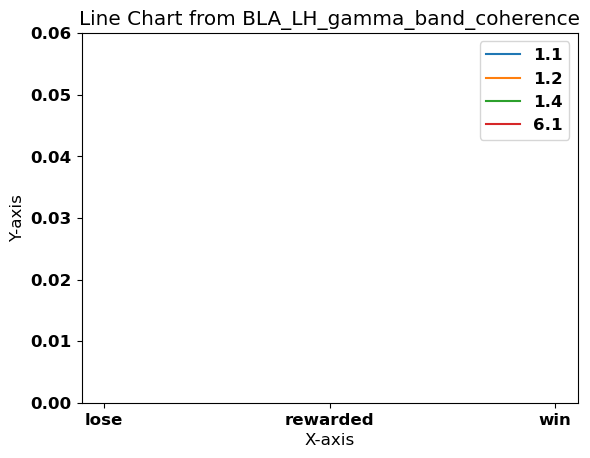

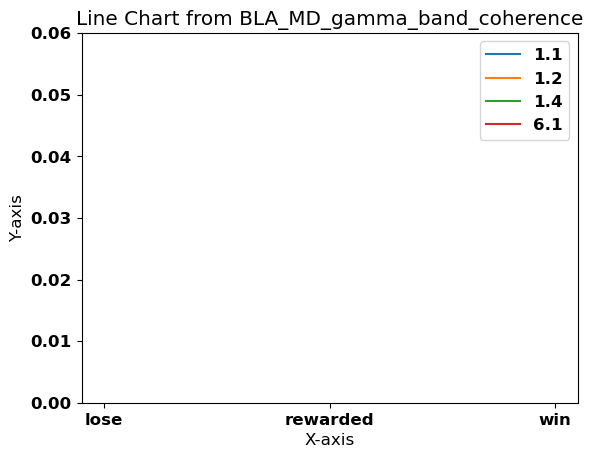

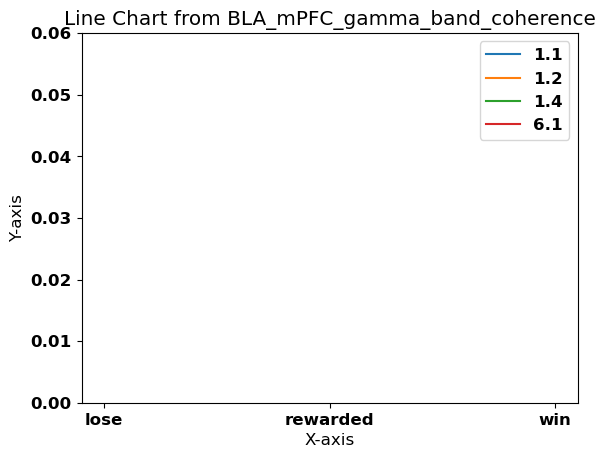

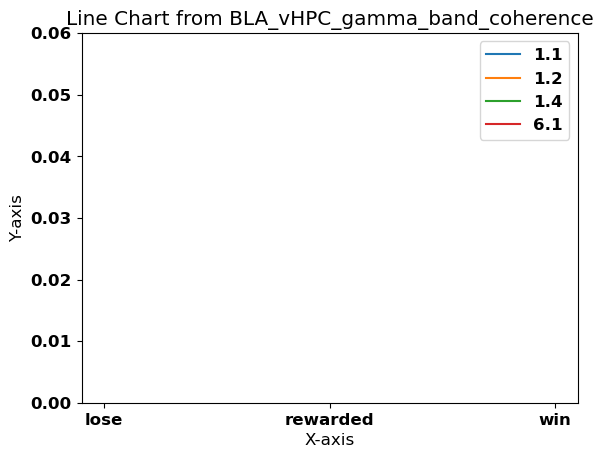

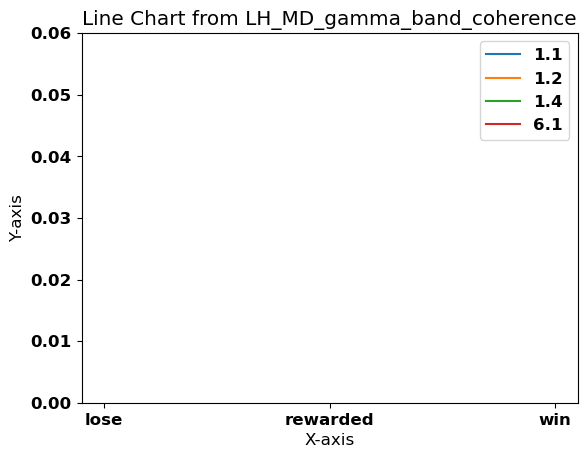

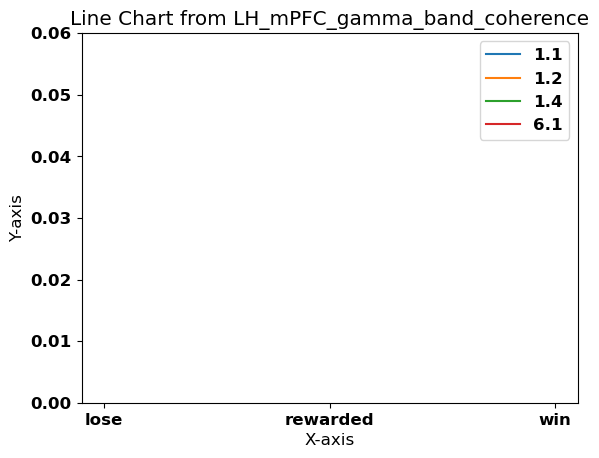

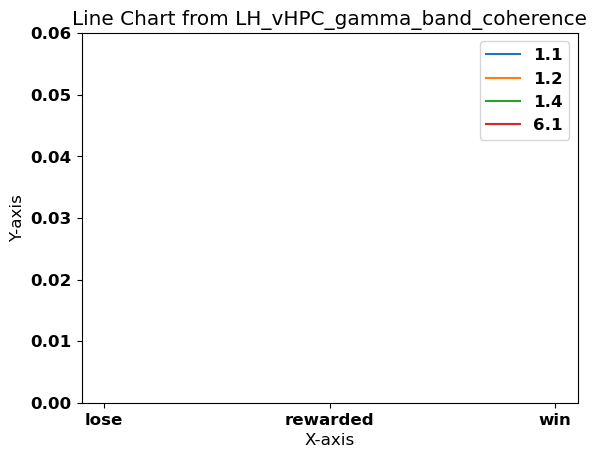

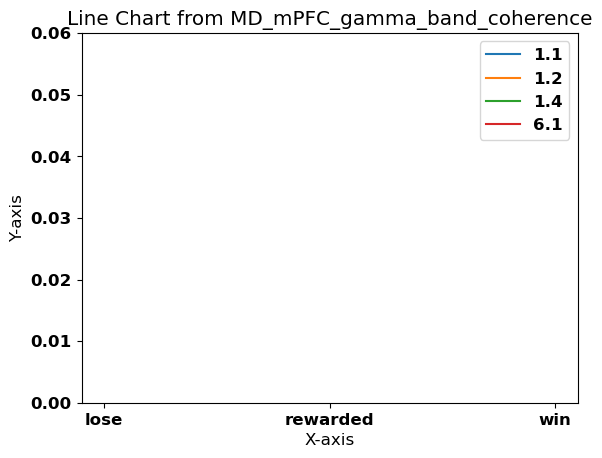

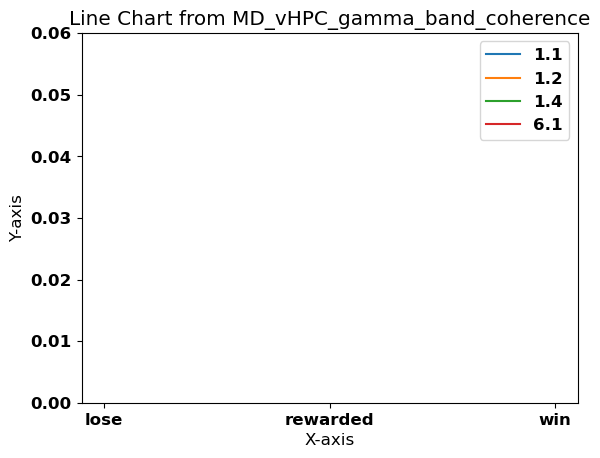

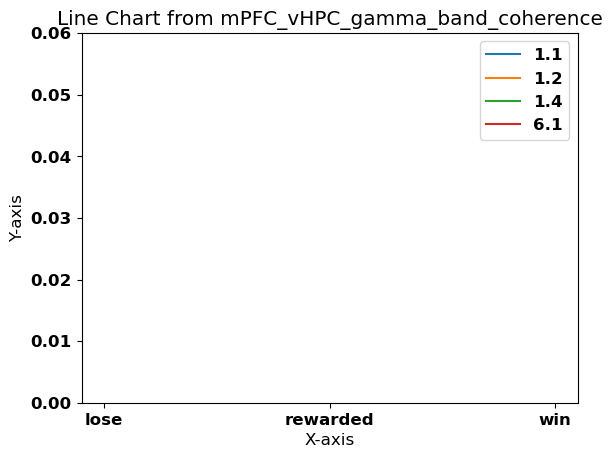

gamma granger only ['BLA_LH_gamma_band_granger', 'LH_BLA_gamma_band_granger', 'BLA_MD_gamma_band_granger', 'MD_BLA_gamma_band_granger', 'BLA_mPFC_gamma_band_granger', 'mPFC_BLA_gamma_band_granger', 'BLA_vHPC_gamma_band_granger', 'vHPC_BLA_gamma_band_granger', 'LH_MD_gamma_band_granger', 'MD_LH_gamma_band_granger', 'LH_mPFC_gamma_band_granger', 'mPFC_LH_gamma_band_granger', 'LH_vHPC_gamma_band_granger', 'vHPC_LH_gamma_band_granger', 'MD_mPFC_gamma_band_granger', 'mPFC_MD_gamma_band_granger', 'MD_vHPC_gamma_band_granger', 'vHPC_MD_gamma_band_granger', 'mPFC_vHPC_gamma_band_granger', 'vHPC_mPFC_gamma_band_granger']


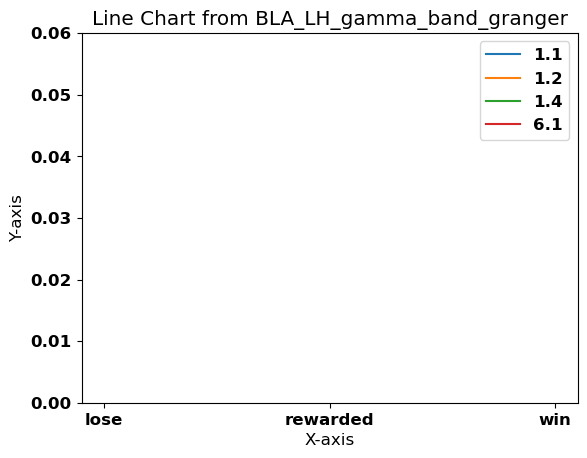

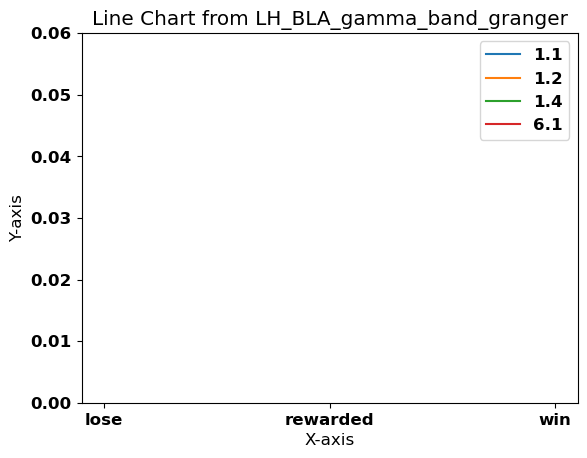

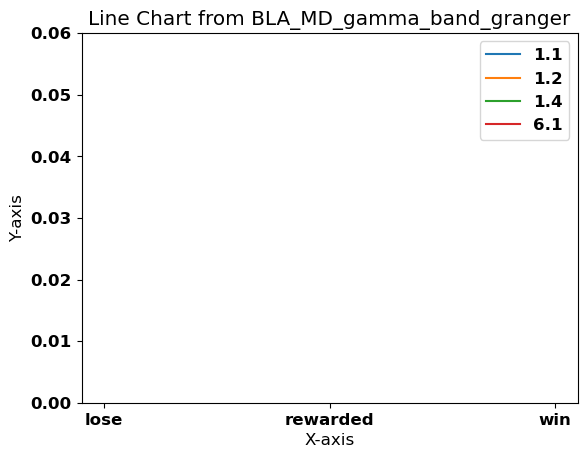

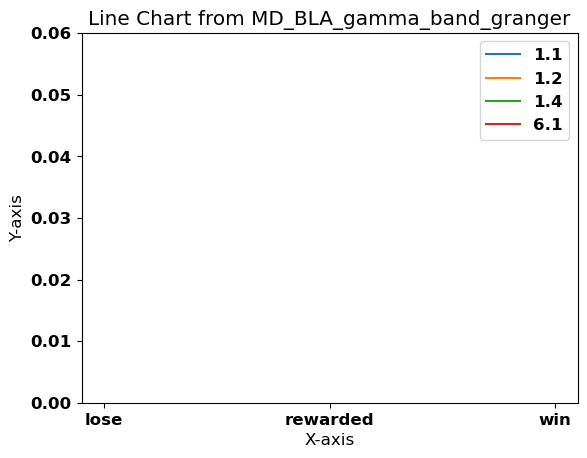

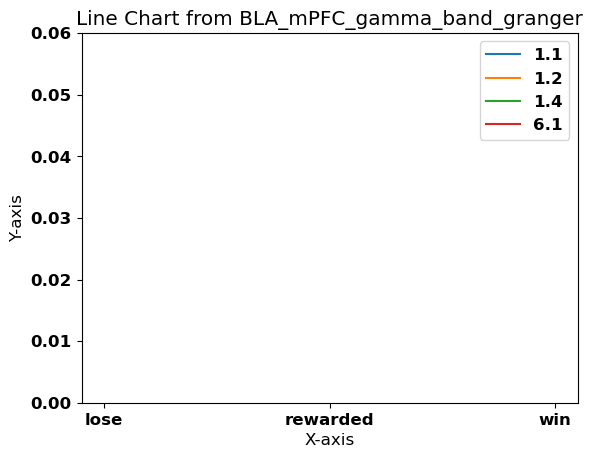

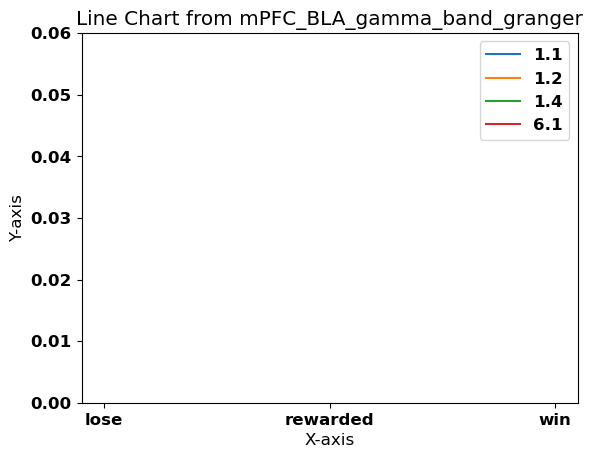

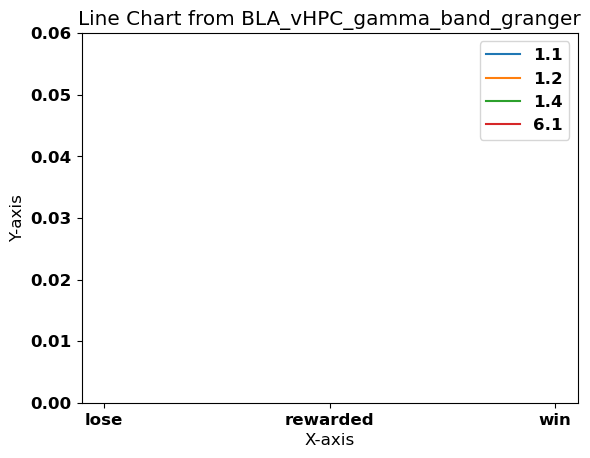

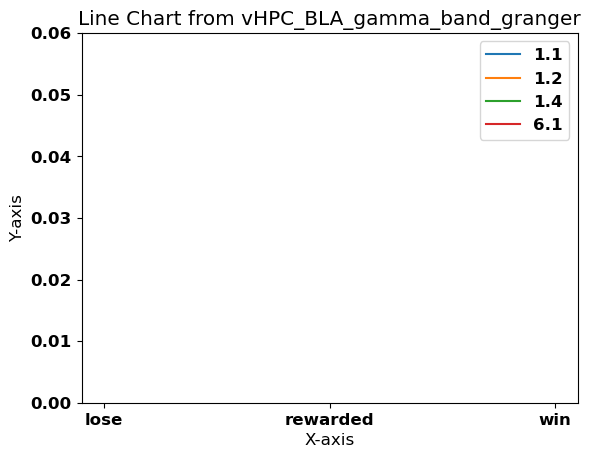

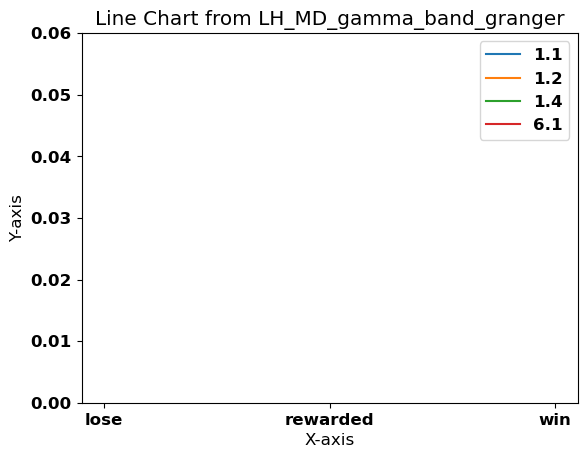

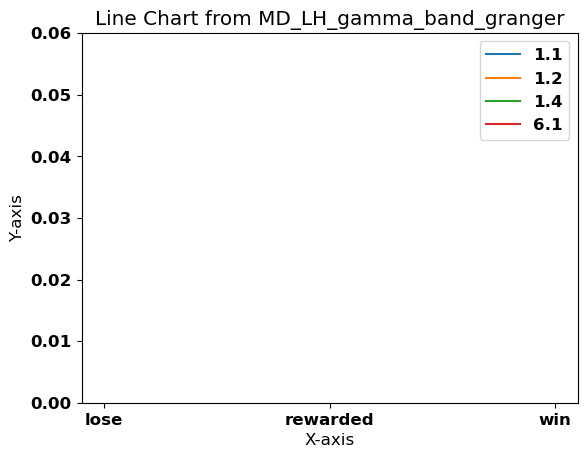

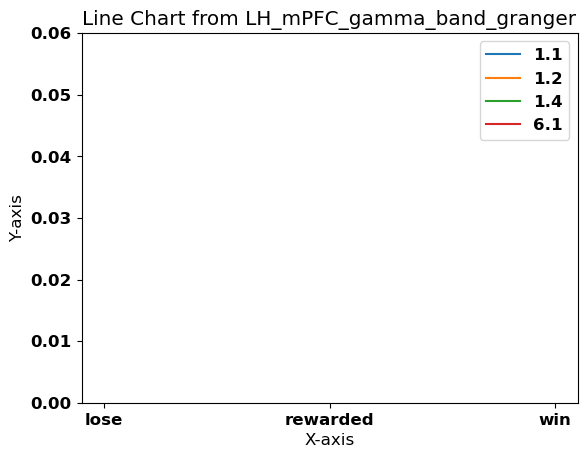

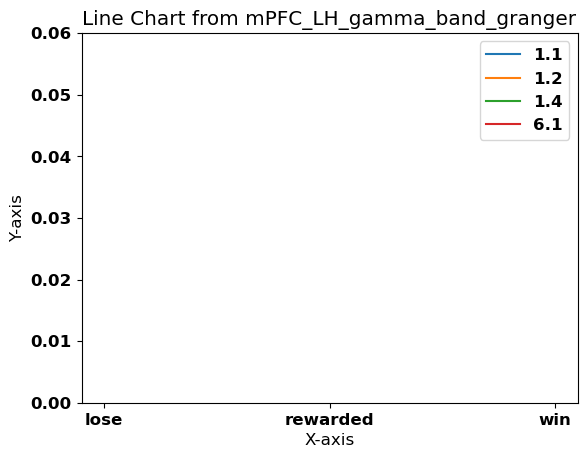

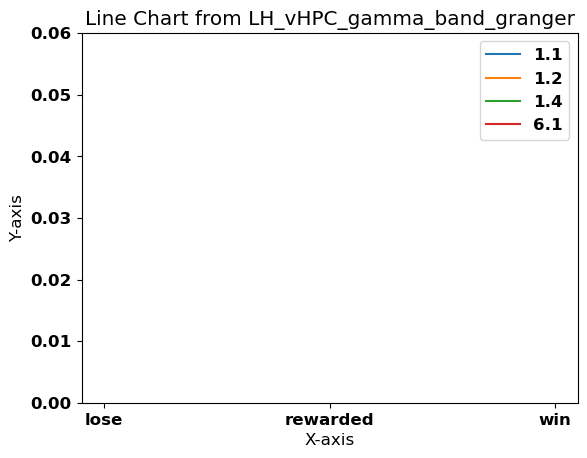

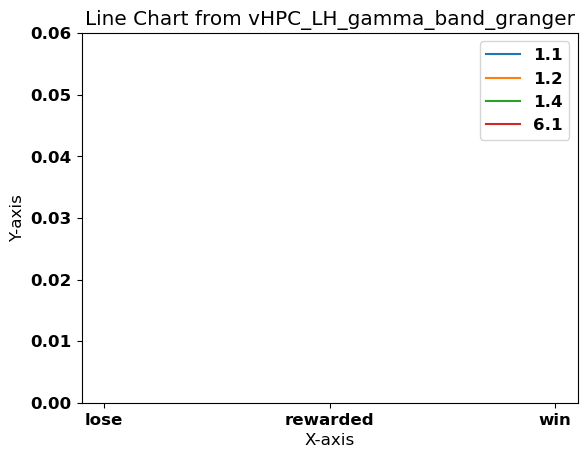

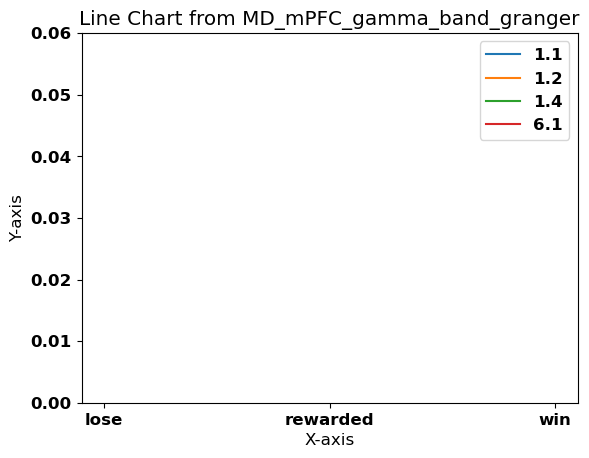

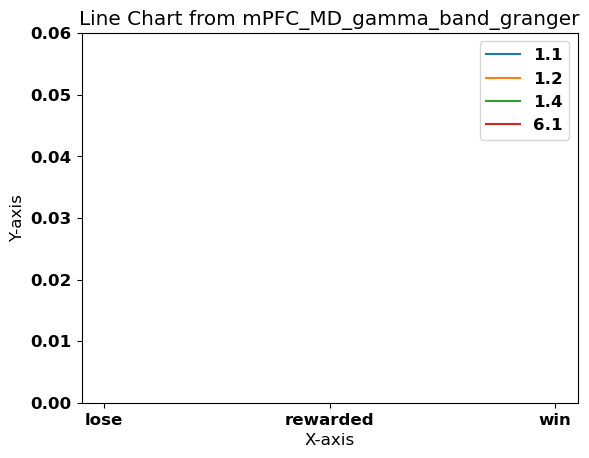

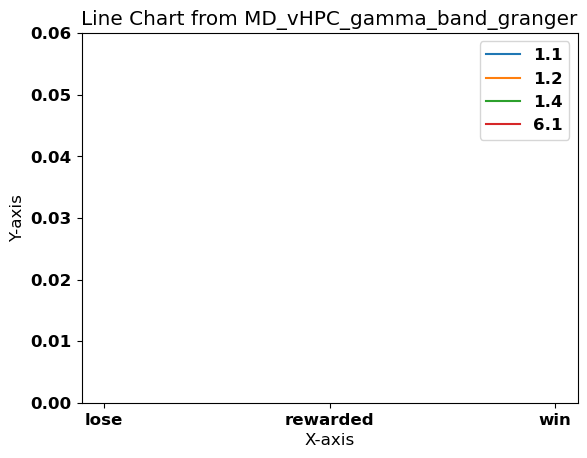

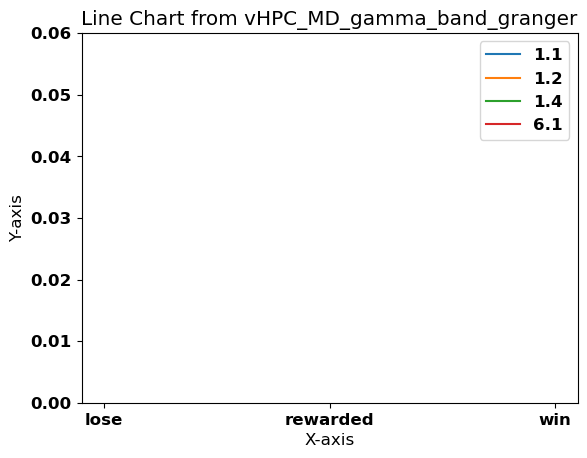

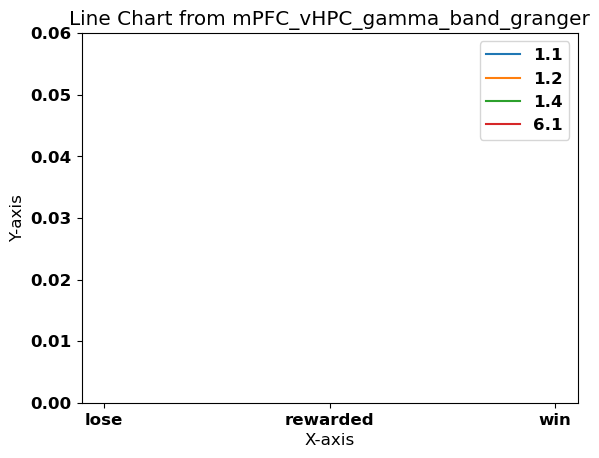

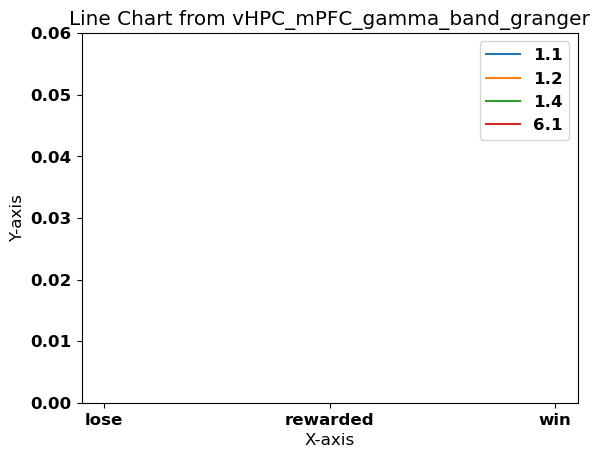

In [83]:
for feature, all_columns in sub_feature_to_columns.items():
    print(feature, all_columns)
    current_df = network_df[all_columns + ["trial_outcome", "current_subject"]].groupby(["trial_outcome", "current_subject"]).mean().reset_index()
    
    for col in all_columns:
    
        # Plotting
        fig, ax = plt.subplots()
        
        # Group by 'label' and plot each group
        for label, group in current_df.groupby('current_subject'):
            group = group.sort_values(by='trial_outcome')  # Sorting might be necessary for categorical x
            ax.plot(group['trial_outcome'], group[col], label=label)
        
        # Adding labels and title
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_title('Line Chart from {}'.format(col))
        ax.legend()
        plt.ylim(0, 0.06)
        plt.show()

theta power only ['mPFC_theta_band_power', 'vHPC_theta_band_power', 'BLA_theta_band_power', 'LH_theta_band_power', 'MD_theta_band_power']


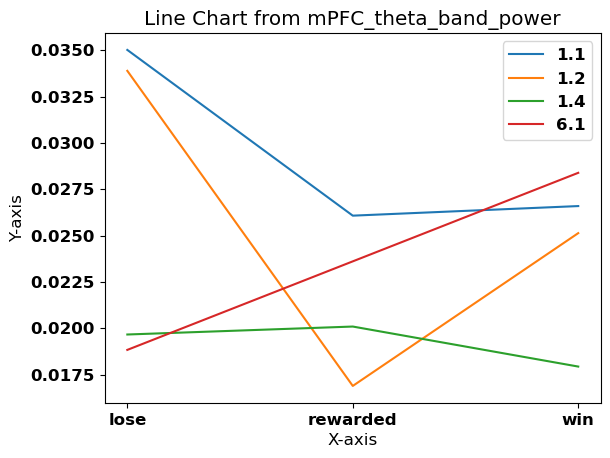

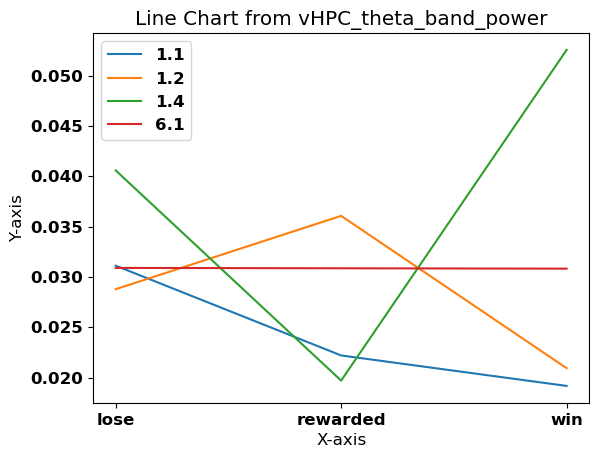

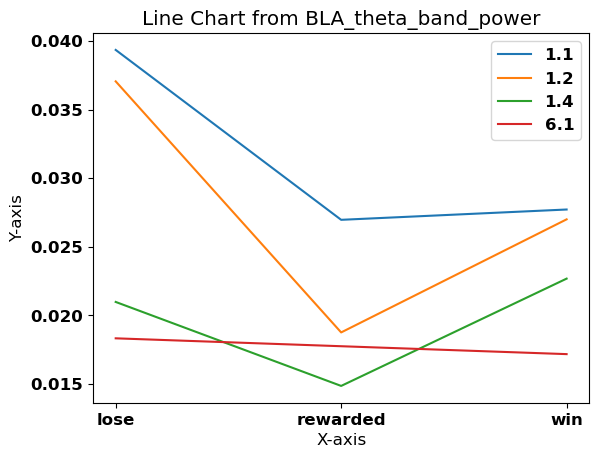

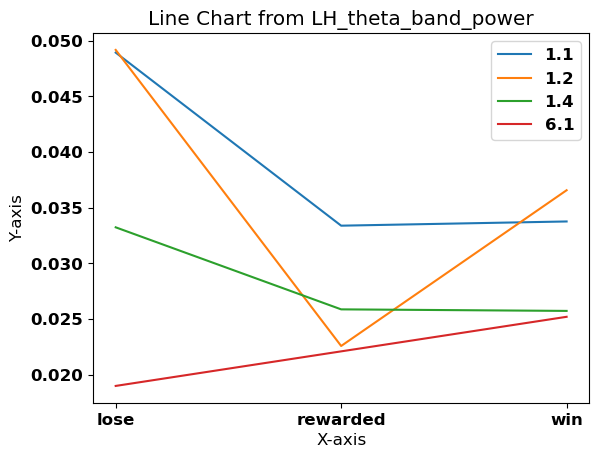

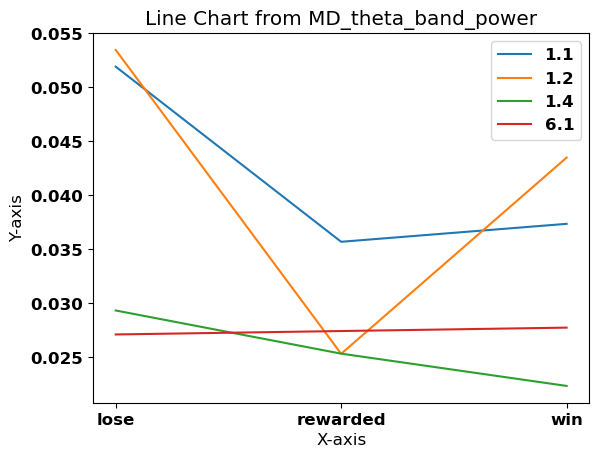

theta coherence only ['BLA_LH_theta_band_coherence', 'BLA_MD_theta_band_coherence', 'BLA_mPFC_theta_band_coherence', 'BLA_vHPC_theta_band_coherence', 'LH_MD_theta_band_coherence', 'LH_mPFC_theta_band_coherence', 'LH_vHPC_theta_band_coherence', 'MD_mPFC_theta_band_coherence', 'MD_vHPC_theta_band_coherence', 'mPFC_vHPC_theta_band_coherence']
theta granger only ['BLA_LH_theta_band_granger', 'LH_BLA_theta_band_granger', 'BLA_MD_theta_band_granger', 'MD_BLA_theta_band_granger', 'BLA_mPFC_theta_band_granger', 'mPFC_BLA_theta_band_granger', 'BLA_vHPC_theta_band_granger', 'vHPC_BLA_theta_band_granger', 'LH_MD_theta_band_granger', 'MD_LH_theta_band_granger', 'LH_mPFC_theta_band_granger', 'mPFC_LH_theta_band_granger', 'LH_vHPC_theta_band_granger', 'vHPC_LH_theta_band_granger', 'MD_mPFC_theta_band_granger', 'mPFC_MD_theta_band_granger', 'MD_vHPC_theta_band_granger', 'vHPC_MD_theta_band_granger', 'mPFC_vHPC_theta_band_granger', 'vHPC_mPFC_theta_band_granger']
gamma power only ['mPFC_gamma_band_pow

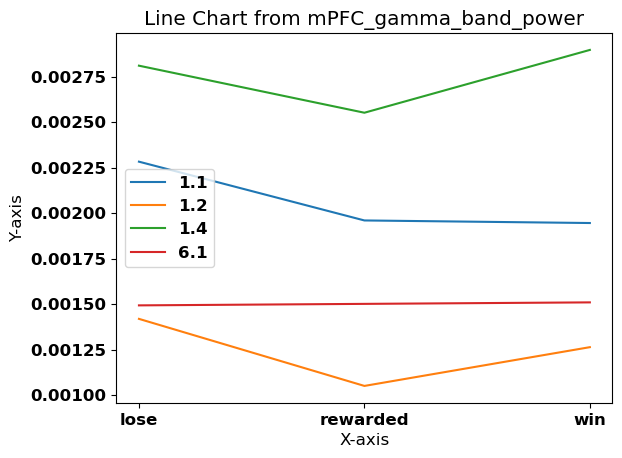

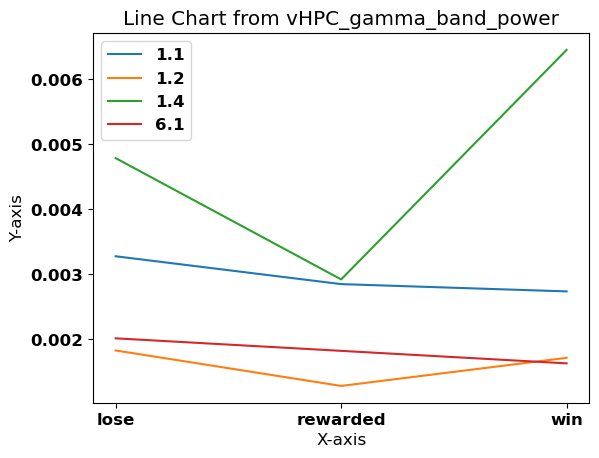

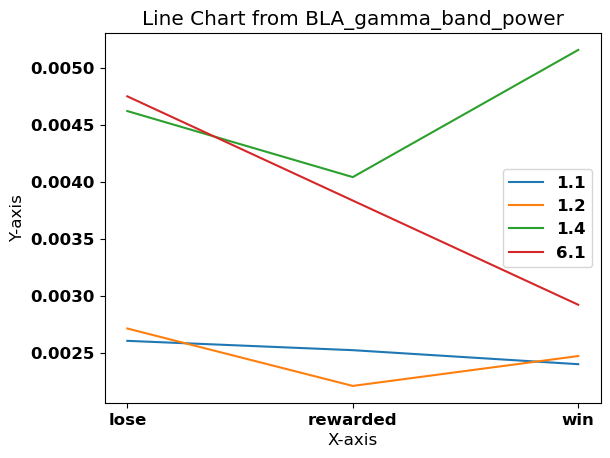

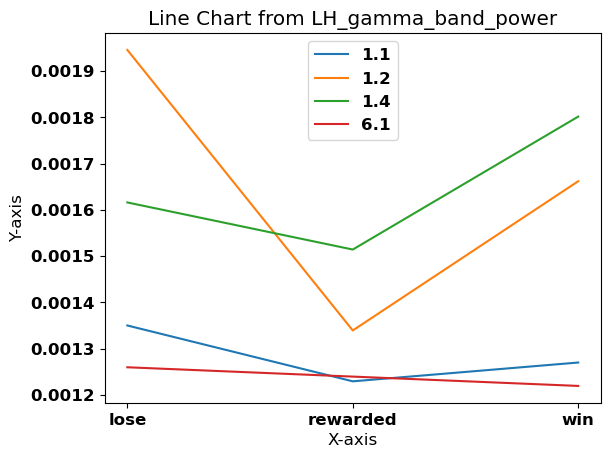

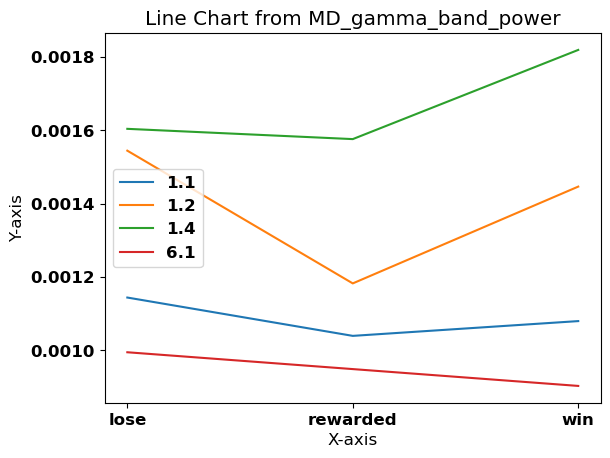

gamma coherence only ['BLA_LH_gamma_band_coherence', 'BLA_MD_gamma_band_coherence', 'BLA_mPFC_gamma_band_coherence', 'BLA_vHPC_gamma_band_coherence', 'LH_MD_gamma_band_coherence', 'LH_mPFC_gamma_band_coherence', 'LH_vHPC_gamma_band_coherence', 'MD_mPFC_gamma_band_coherence', 'MD_vHPC_gamma_band_coherence', 'mPFC_vHPC_gamma_band_coherence']
gamma granger only ['BLA_LH_gamma_band_granger', 'LH_BLA_gamma_band_granger', 'BLA_MD_gamma_band_granger', 'MD_BLA_gamma_band_granger', 'BLA_mPFC_gamma_band_granger', 'mPFC_BLA_gamma_band_granger', 'BLA_vHPC_gamma_band_granger', 'vHPC_BLA_gamma_band_granger', 'LH_MD_gamma_band_granger', 'MD_LH_gamma_band_granger', 'LH_mPFC_gamma_band_granger', 'mPFC_LH_gamma_band_granger', 'LH_vHPC_gamma_band_granger', 'vHPC_LH_gamma_band_granger', 'MD_mPFC_gamma_band_granger', 'mPFC_MD_gamma_band_granger', 'MD_vHPC_gamma_band_granger', 'vHPC_MD_gamma_band_granger', 'mPFC_vHPC_gamma_band_granger', 'vHPC_mPFC_gamma_band_granger']


In [87]:
for feature, all_columns in sub_feature_to_columns.items():
    print(feature, all_columns)
    if "power" not in feature:
        continue
    current_df = network_df[all_columns + ["trial_outcome", "current_subject"]].groupby(["trial_outcome", "current_subject"]).mean().reset_index()
    sem_df = network_df[all_columns + ["trial_outcome", "current_subject"]].groupby(["trial_outcome", "current_subject"]).sem().reset_index()
    
    for col in all_columns:
    
        # Plotting
        fig, ax = plt.subplots()
        
        # Group by 'label' and plot each group
        for label, group in current_df.groupby('current_subject'):
            group = group.sort_values(by='trial_outcome')  # Sorting might be necessary for categorical x
            ax.plot(group['trial_outcome'], group[col], label=label)
        
        # Adding labels and title
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_title('Line Chart from {}'.format(col))
        ax.legend()

        plt.savefig("./proc/line_charts/line_chart_{}.png".format(col))
        
        plt.show()


In [86]:
sem_df

trial_outcome current_subject  mPFC_gamma_band_power  \
0           lose             1.1               0.000086   
1           lose             1.2               0.000198   
2           lose             1.4               0.000069   
3           lose             6.1               0.000063   
4       rewarded             1.1               0.000045   
5       rewarded             1.2               0.000021   
6       rewarded             1.4               0.000138   
7            win             1.1               0.000033   
8            win             1.2               0.000044   
9            win             1.4               0.000072   
10           win             6.1               0.000030   

    vHPC_gamma_band_power  BLA_gamma_band_power  LH_gamma_band_power  \
0                0.000162              0.000096             0.000047   
1                0.000086              0.000255             0.000403   
2                0.000351              0.000152             0.000049   
3                0.000151              0.000245             0.000064   
4                0.000085              0.000087             0.000033   
5                0.000046              0.000049             0.000037   
6                0.000135              0.000163             0.000055   
7                0.000049              0.000044             0.000027   
8                0.000083              0.000154             0.000075   
9                0.000802              0.000500             0.000105   
10               0.000028              0.000154             0.000022   

    MD_gamma_band_power  
0              0.000043  
1              0.000259  
2              0.000057  
3              0.000059  
4              0.000029  
5              0.000026  
6              0.000057  
7              0.000024  
8              0.000051  
9              0.000122  
10             0.000020

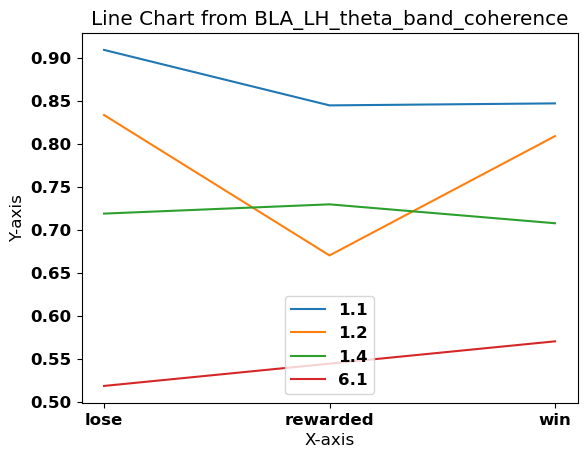

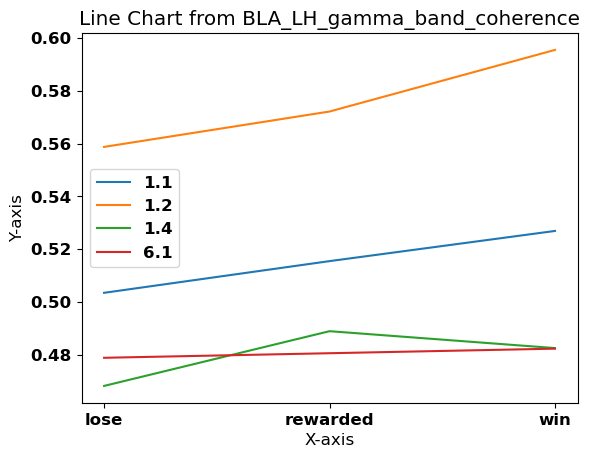

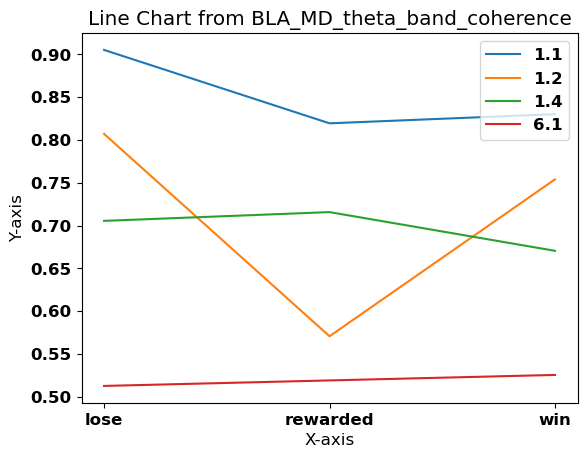

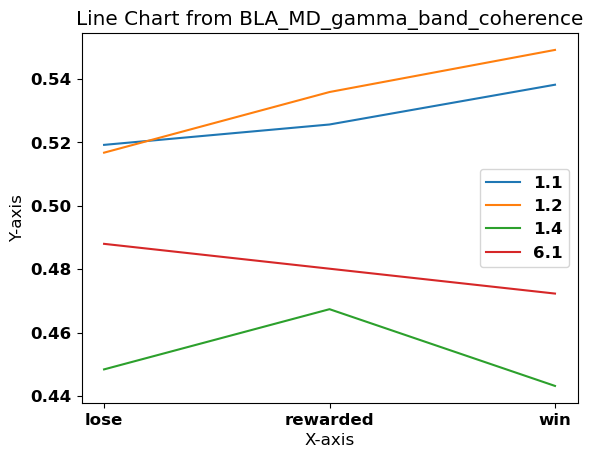

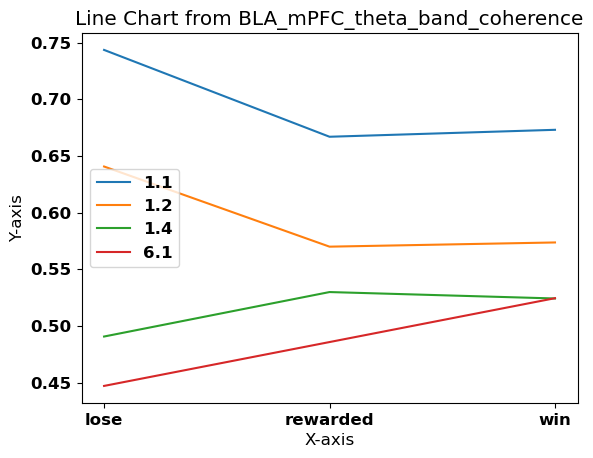

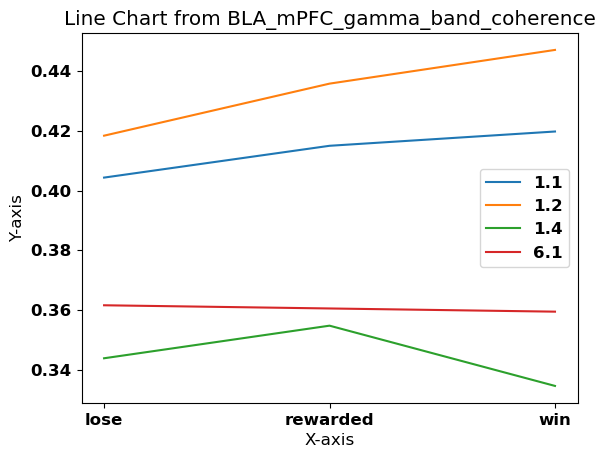

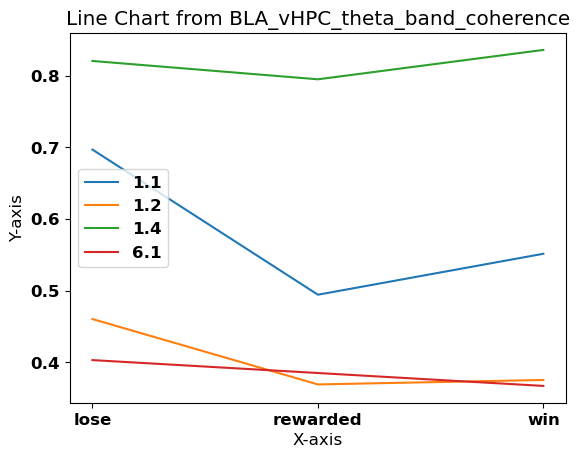

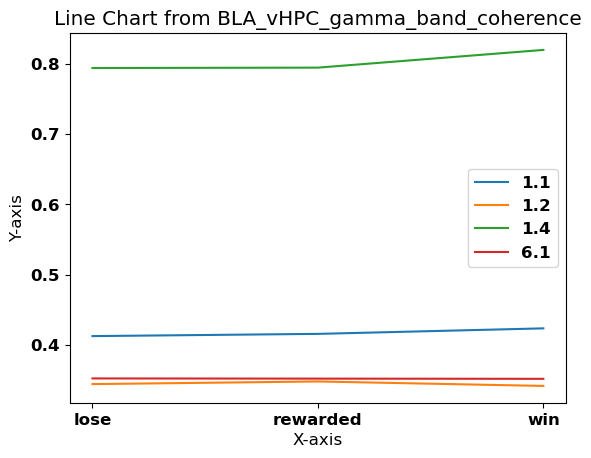

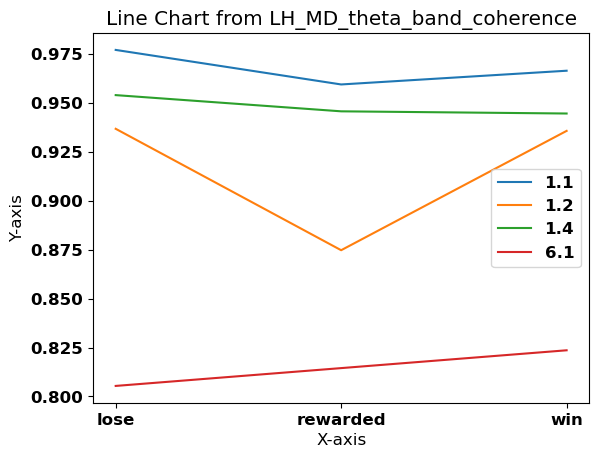

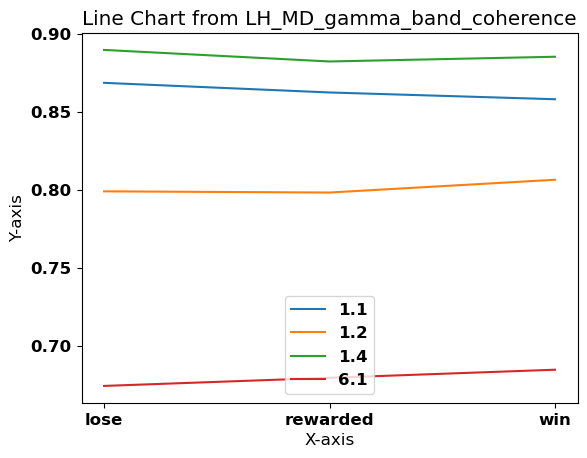

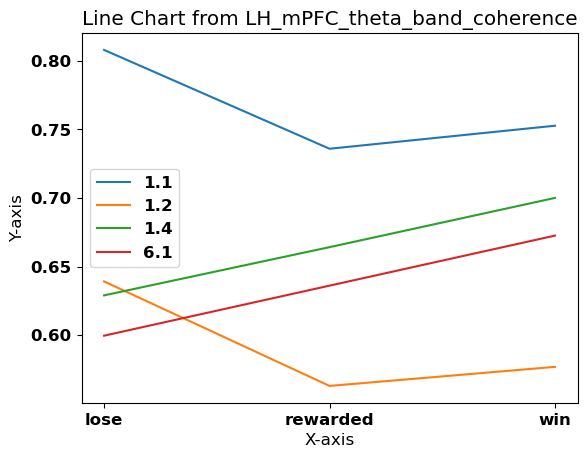

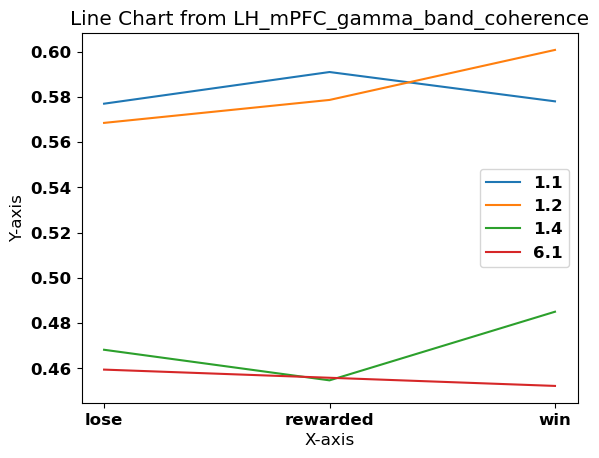

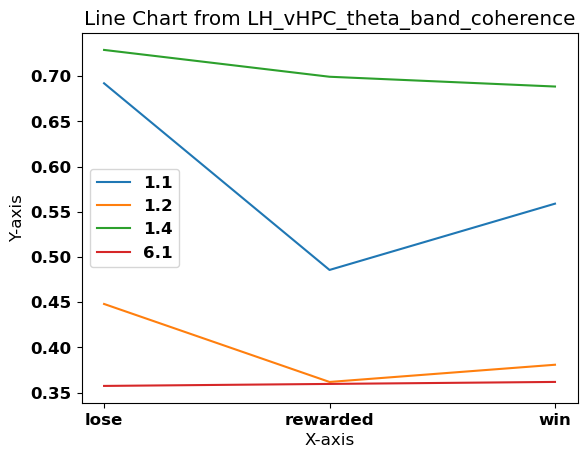

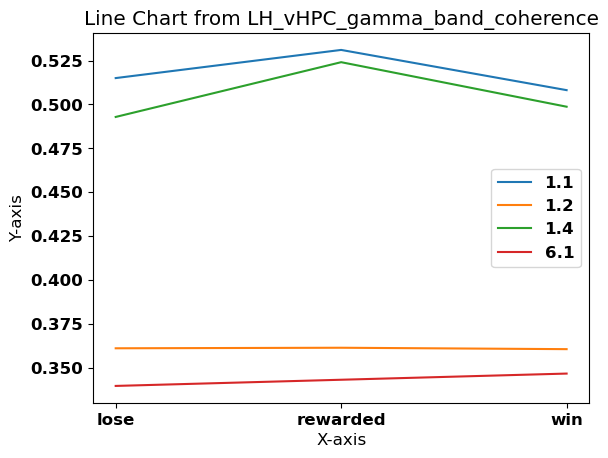

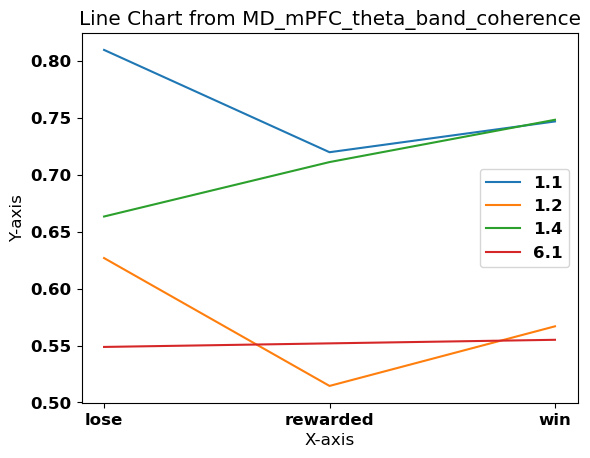

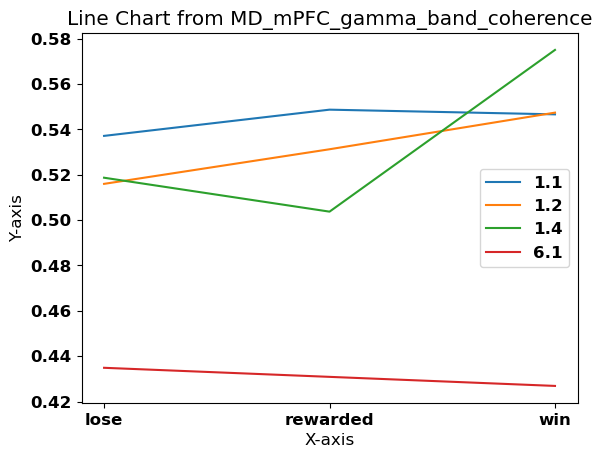

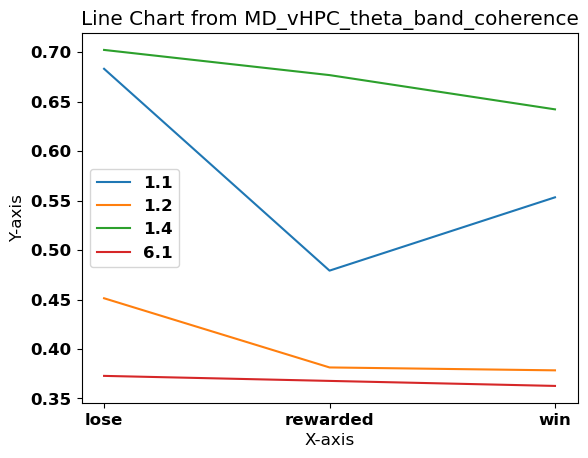

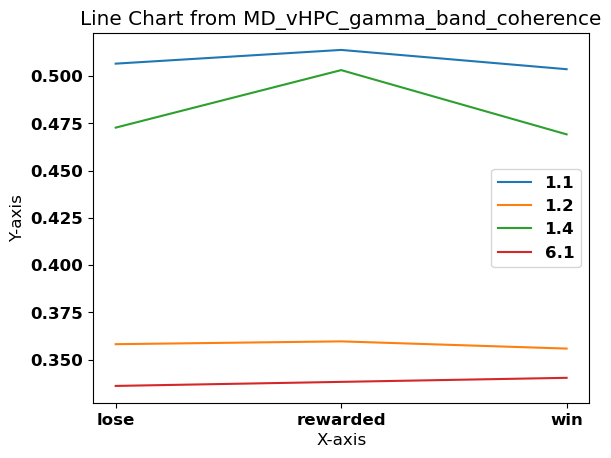

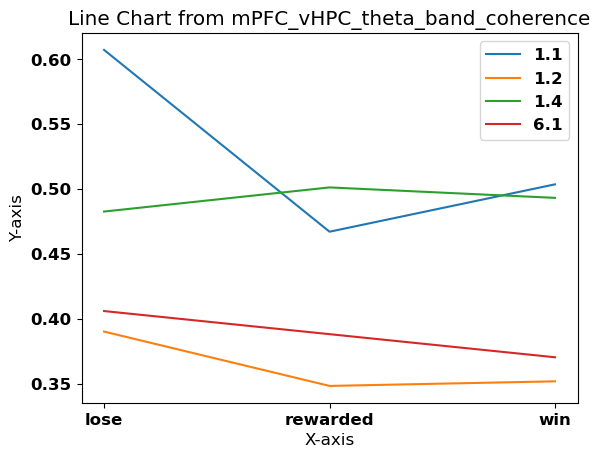

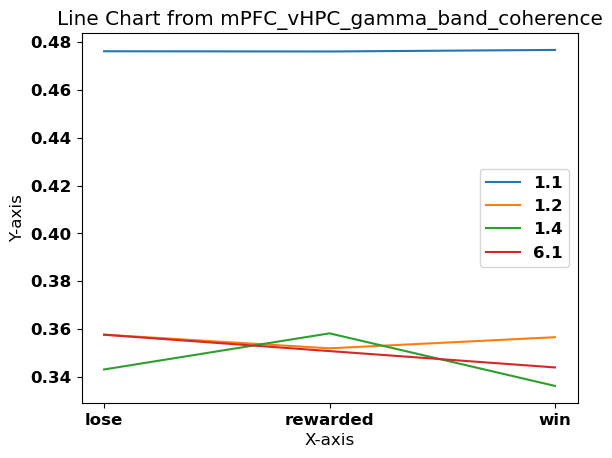

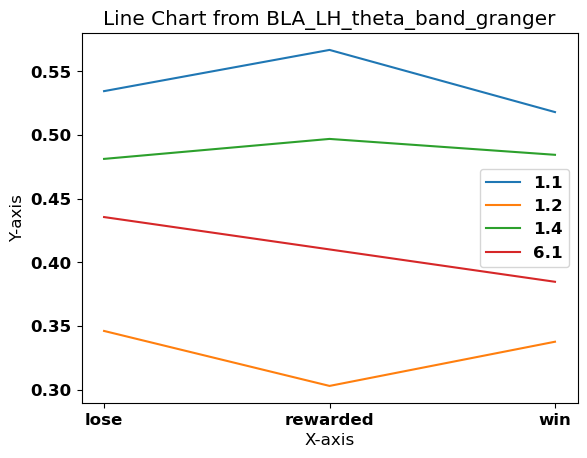

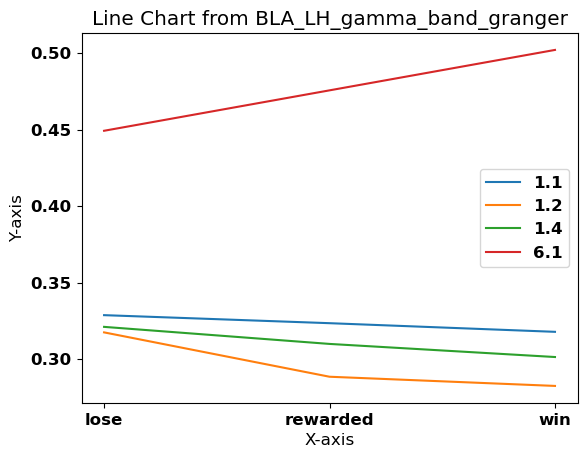

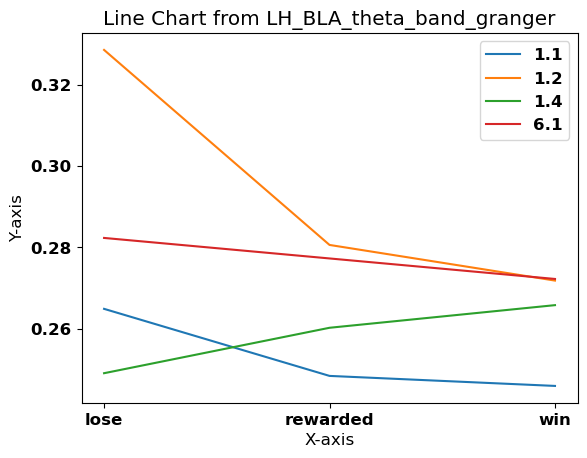

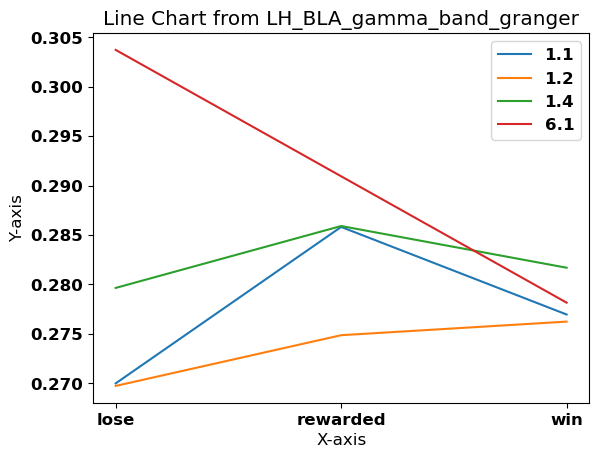

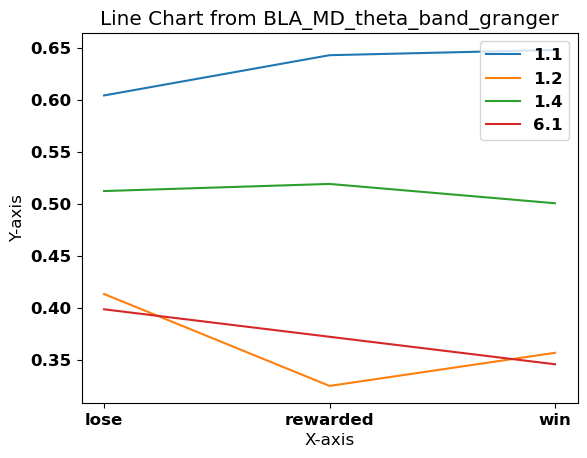

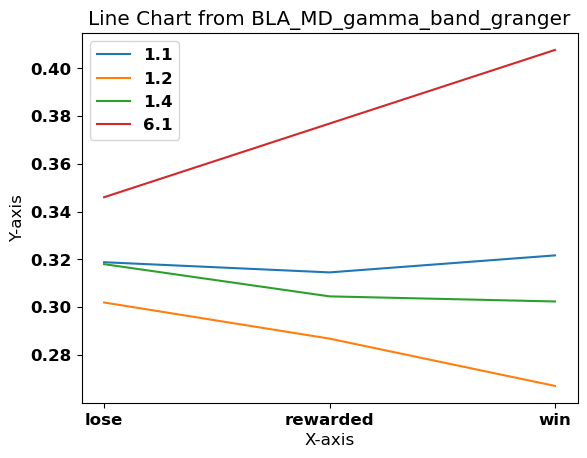

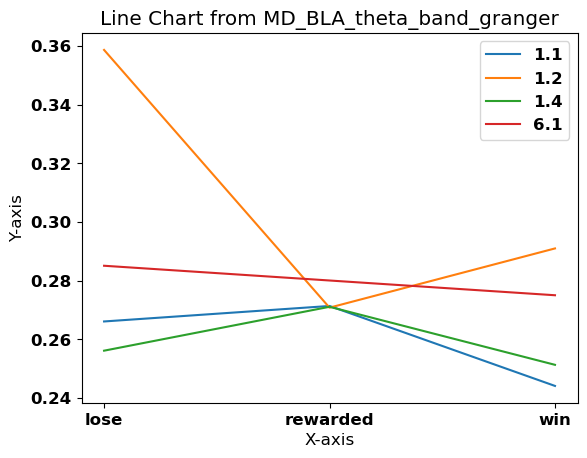

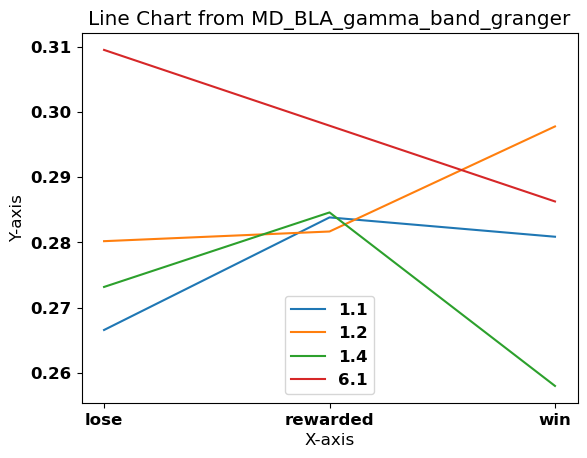

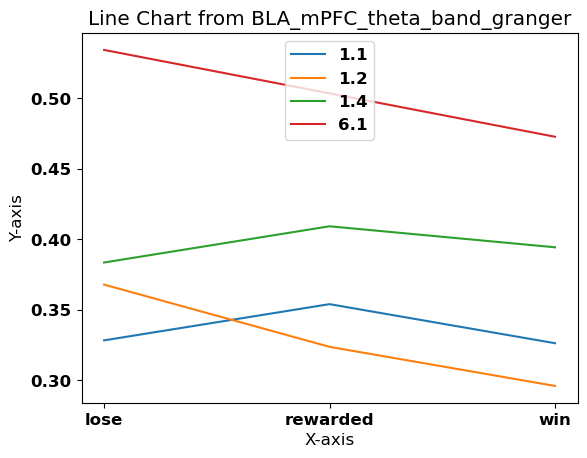

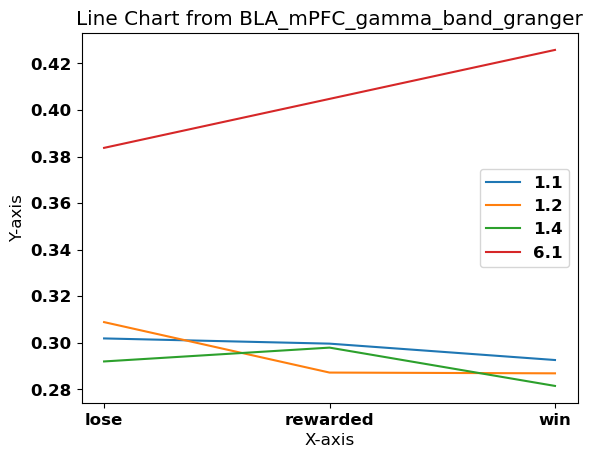

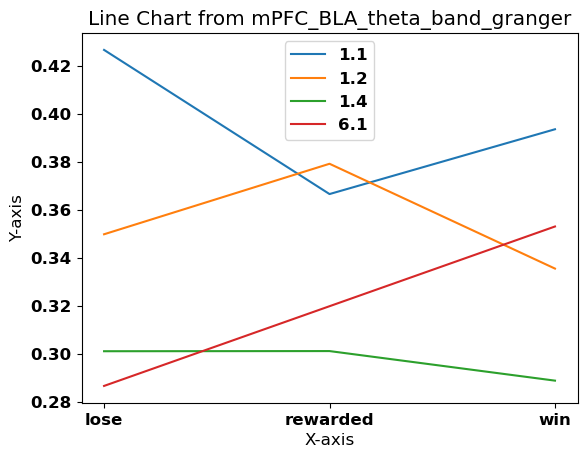

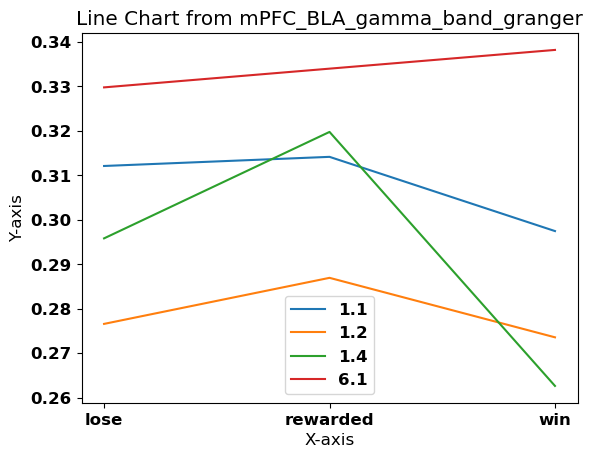

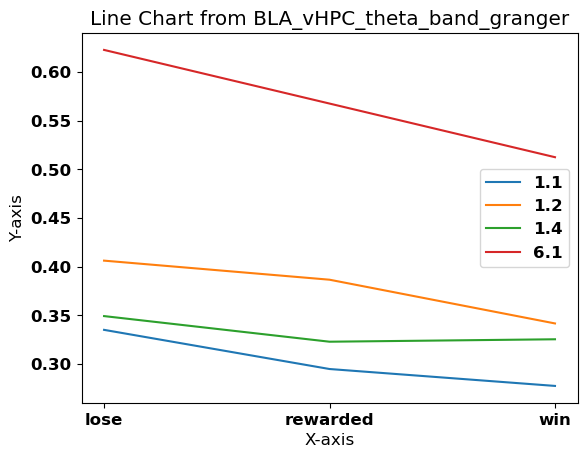

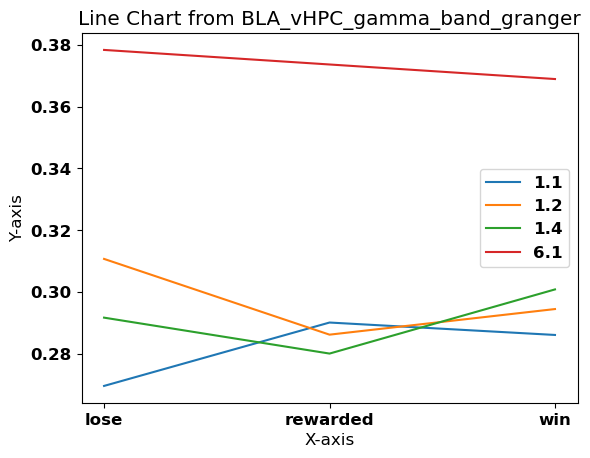

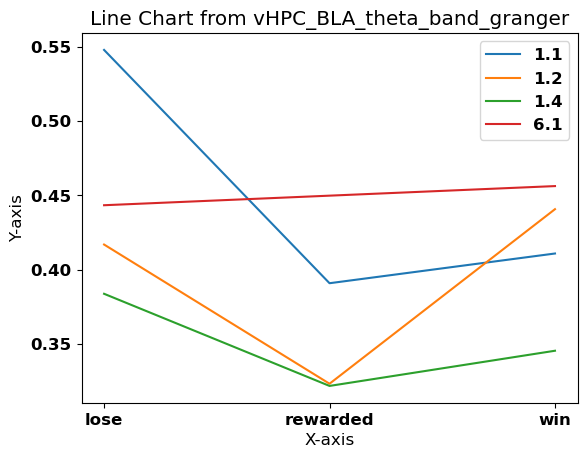

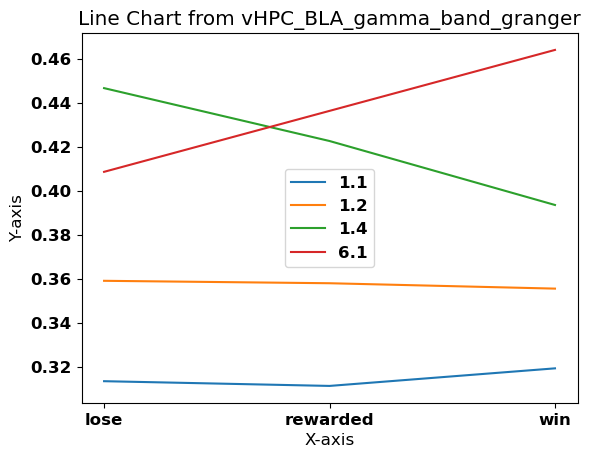

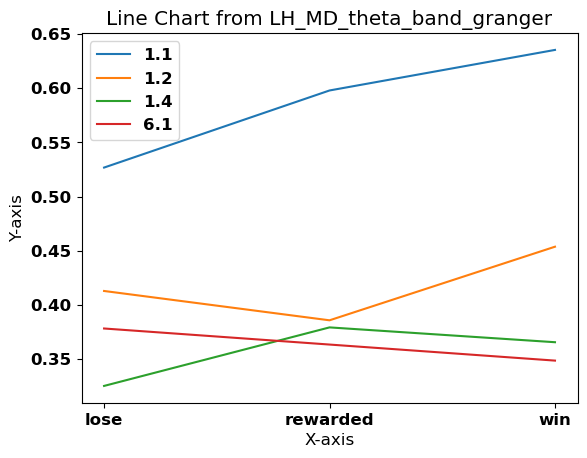

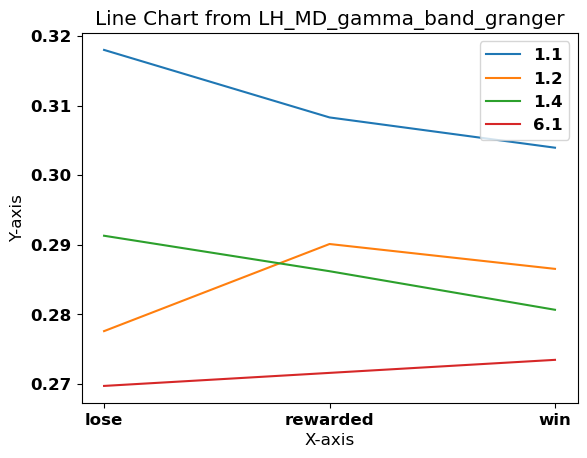

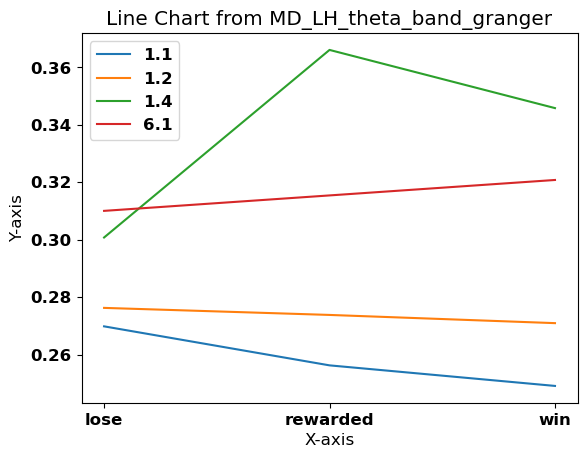

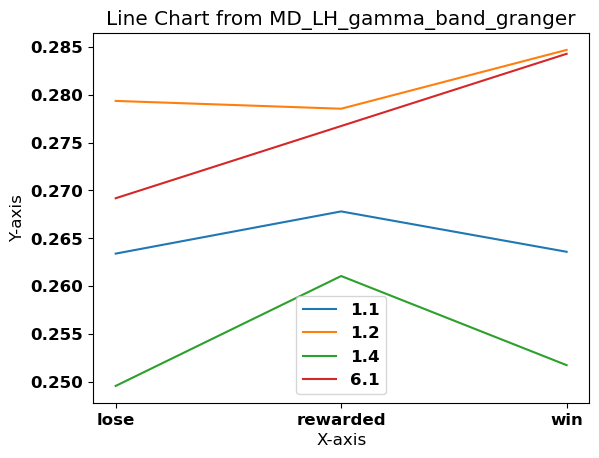

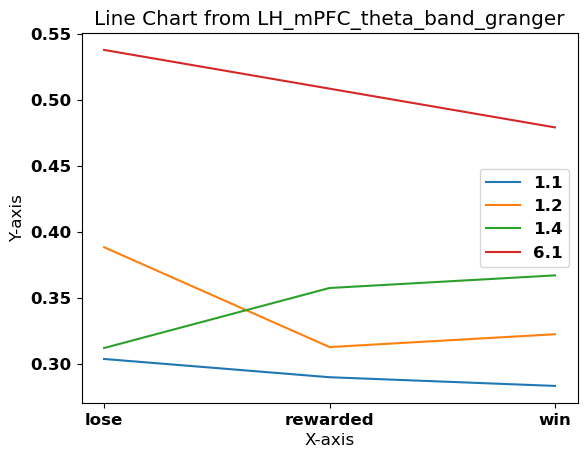

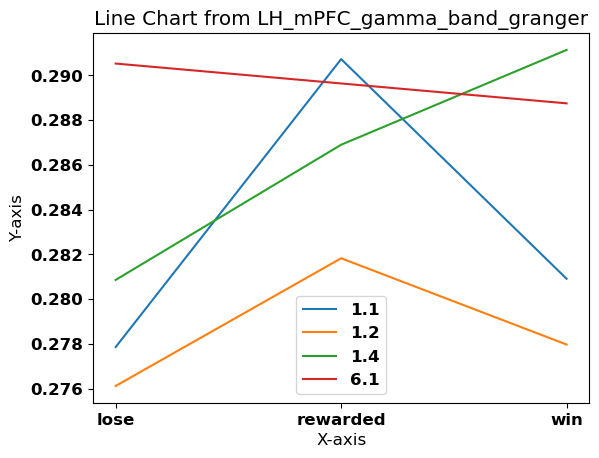

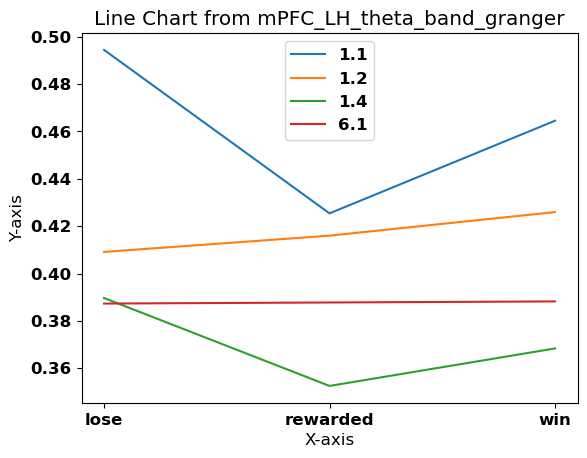

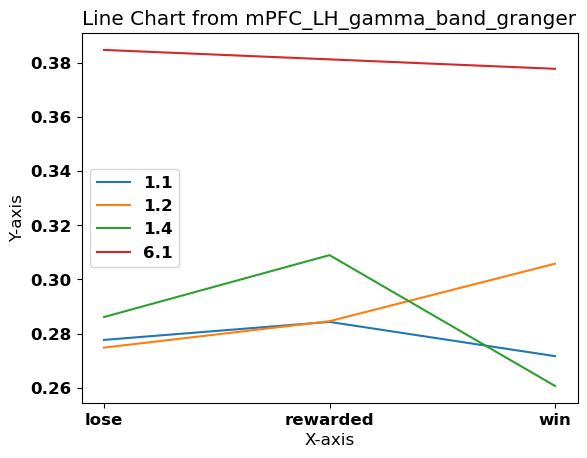

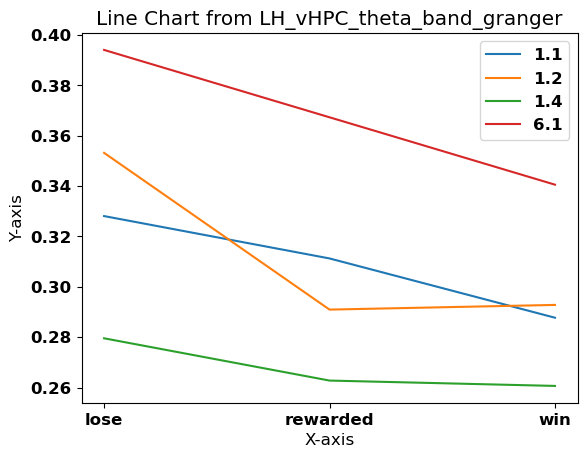

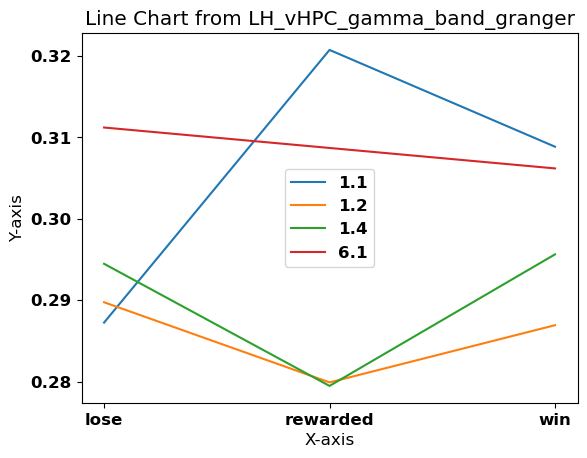

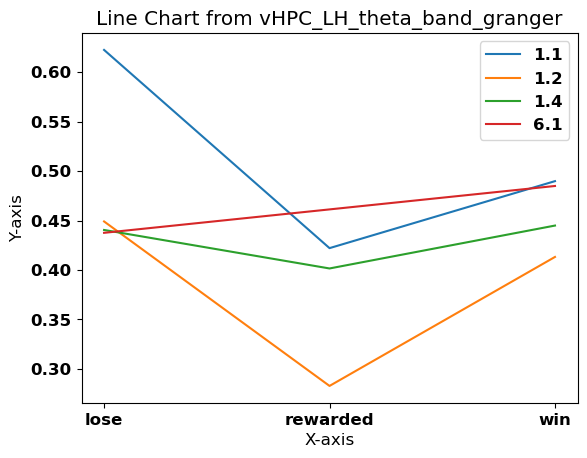

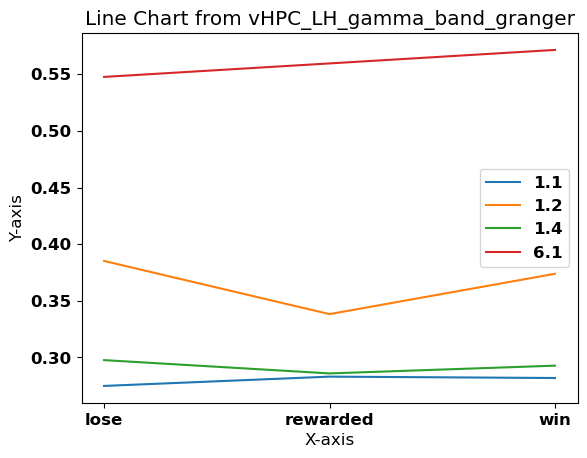

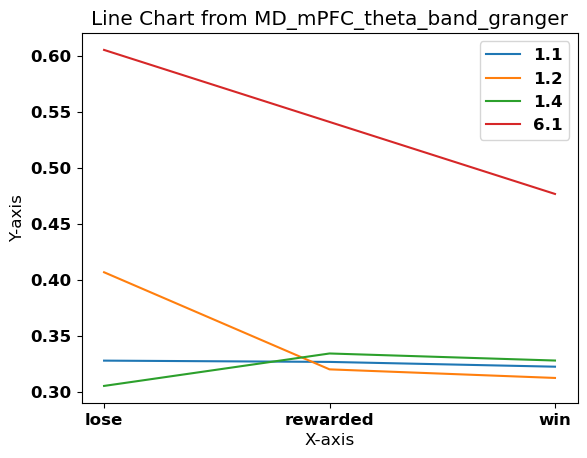

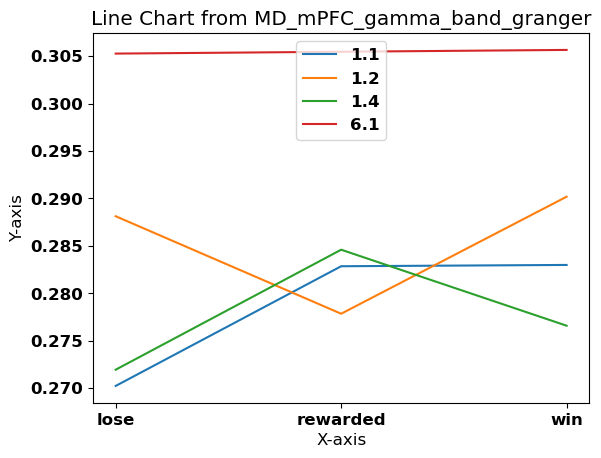

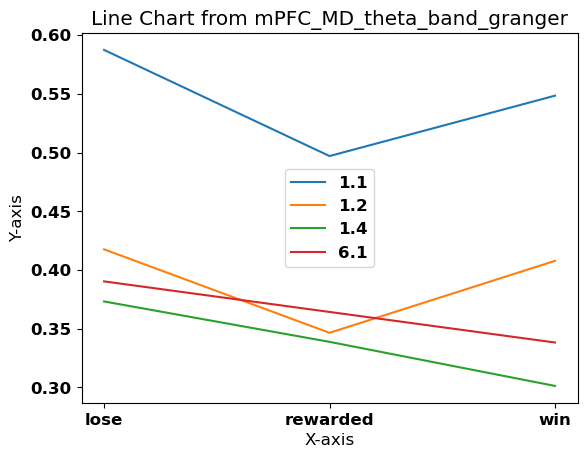

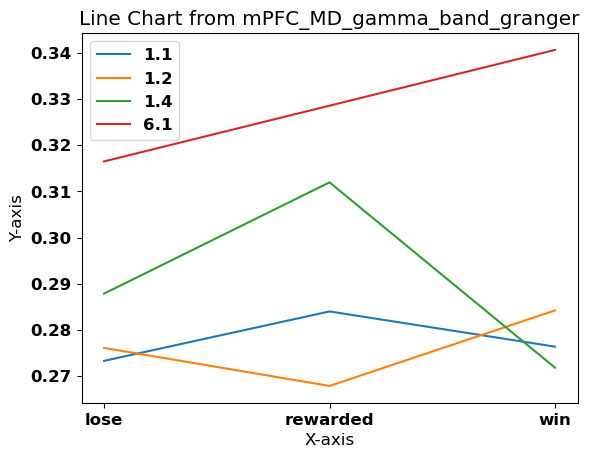

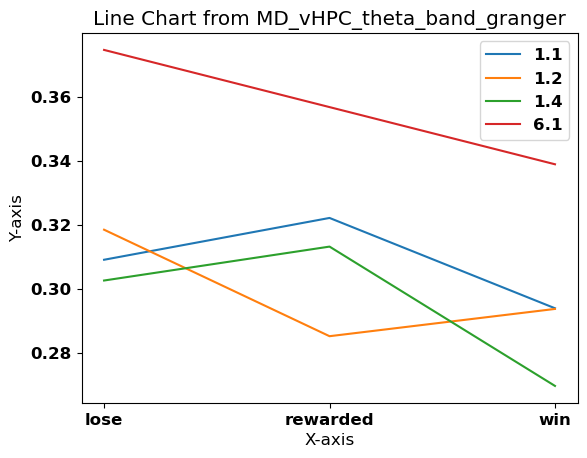

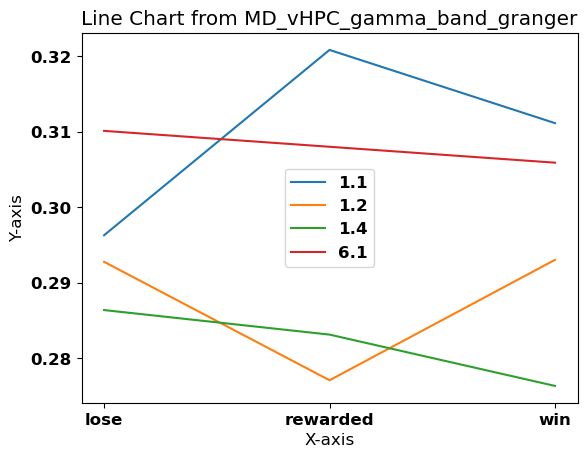

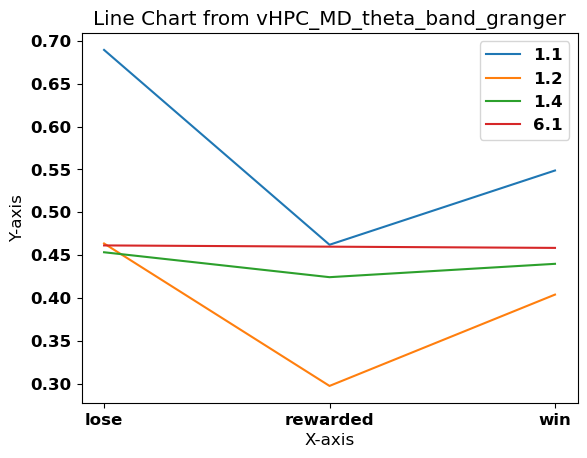

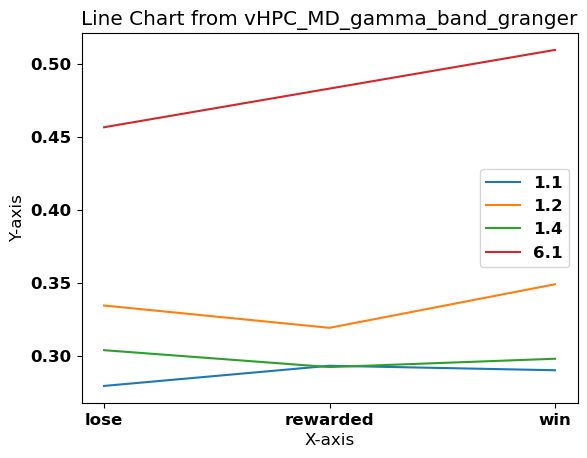

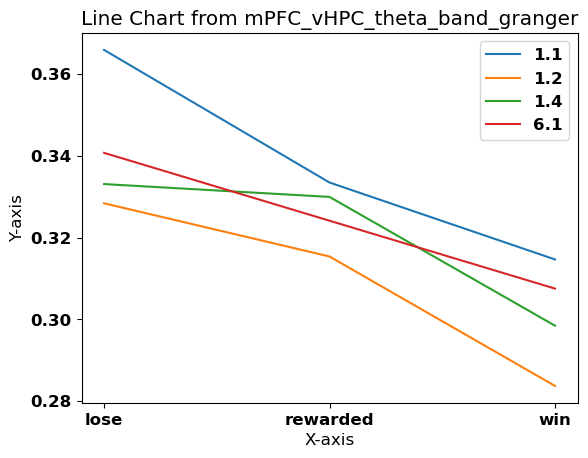

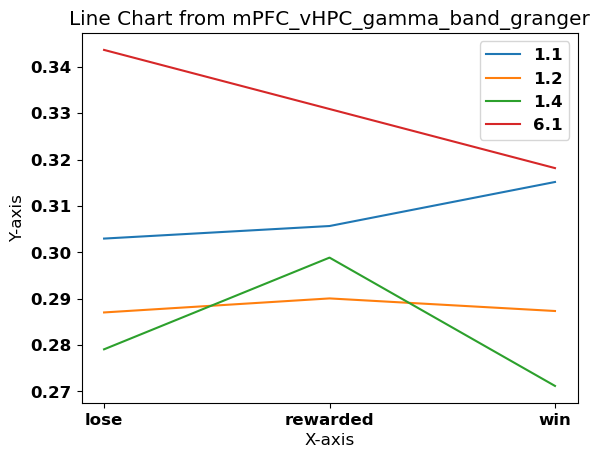

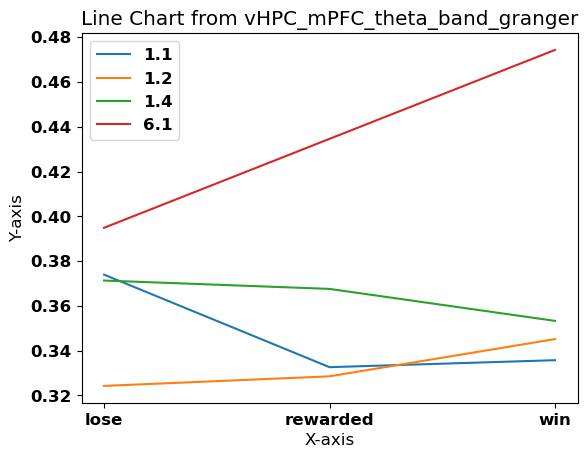

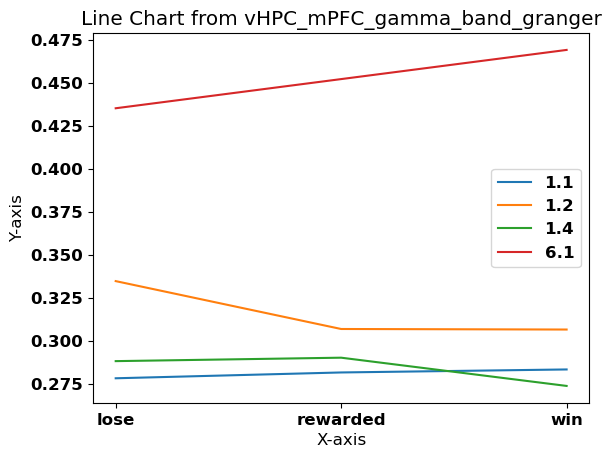

In [88]:
for col in feature_columns:
    # print(feature, all_columns)
    if "power" in col:
        continue
    current_df = network_df[feature_columns + ["trial_outcome", "current_subject"]].groupby(["trial_outcome", "current_subject"]).mean().reset_index()
        
    # Plotting
    fig, ax = plt.subplots()
    
    # Group by 'label' and plot each group
    for label, group in current_df.groupby('current_subject'):
        group = group.sort_values(by='trial_outcome')  # Sorting might be necessary for categorical x
        ax.plot(group['trial_outcome'], group[col], label=label)
    
    # Adding labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Line Chart from {}'.format(col))
    ax.legend()
    # plt.ylim(0, 0.06)
    plt.savefig("./proc/line_charts/line_chart_{}.png".format(col))
    plt.show()

    

In [79]:
group

trial_outcome current_subject  mPFC_theta_band_power  vHPC_theta_band_power  \
0          lose             1.1               0.035014               0.031110   
4      rewarded             1.1               0.026074               0.022192   
7           win             1.1               0.026591               0.019165   

   BLA_theta_band_power  LH_theta_band_power  MD_theta_band_power  
0              0.039351             0.048926             0.051915  
4              0.026964             0.033382             0.035702  
7              0.027716             0.033760             0.037364

In [73]:
current_df.reset_index()

trial_outcome current_subject  mPFC_theta_band_power  \
0           lose             1.1               0.035014   
1           lose             1.2               0.033886   
2           lose             1.4               0.019663   
3           lose             6.1               0.018833   
4       rewarded             1.1               0.026074   
5       rewarded             1.2               0.016890   
6       rewarded             1.4               0.020093   
7            win             1.1               0.026591   
8            win             1.2               0.025131   
9            win             1.4               0.017934   
10           win             6.1               0.028384   

    vHPC_theta_band_power  BLA_theta_band_power  LH_theta_band_power  \
0                0.031110              0.039351             0.048926   
1                0.028773              0.037059             0.049167   
2                0.040573              0.020977             0.033234   
3                0.030889              0.018324             0.018990   
4                0.022192              0.026964             0.033382   
5                0.036060              0.018754             0.022577   
6                0.019695              0.014854             0.025866   
7                0.019165              0.027716             0.033760   
8                0.020929              0.026998             0.036565   
9                0.052544              0.022677             0.025727   
10               0.030815              0.017172             0.025198   

    MD_theta_band_power  
0              0.051915  
1              0.053463  
2              0.029342  
3              0.027123  
4              0.035702  
5              0.025331  
6              0.025346  
7              0.037364  
8              0.043496  
9              0.022359  
10             0.027755

In [91]:
" + ".join(all_columns)

'BLA_LH_gamma_band_granger + LH_BLA_gamma_band_granger + BLA_MD_gamma_band_granger + MD_BLA_gamma_band_granger + BLA_mPFC_gamma_band_granger + mPFC_BLA_gamma_band_granger + BLA_vHPC_gamma_band_granger + vHPC_BLA_gamma_band_granger + LH_MD_gamma_band_granger + MD_LH_gamma_band_granger + LH_mPFC_gamma_band_granger + mPFC_LH_gamma_band_granger + LH_vHPC_gamma_band_granger + vHPC_LH_gamma_band_granger + MD_mPFC_gamma_band_granger + mPFC_MD_gamma_band_granger + MD_vHPC_gamma_band_granger + vHPC_MD_gamma_band_granger + mPFC_vHPC_gamma_band_granger + vHPC_mPFC_gamma_band_granger'

In [105]:
network_df = network_df[network_df["trial_outcome"].isin(["win", "lose"])]

In [118]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

# Assuming `df` is your DataFrame
# Example model formula: 'response_variable ~ C(trial_type) + (1|mouse_id)'
model = smf.mixedlm("{} ~ C(trial_outcome)".format("mPFC_theta_band_power"), MERGED_LFP_AND_SLEAP, groups=MERGED_LFP_AND_SLEAP["current_subject"])
result = model.fit()

print(result.summary())

                 Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  mPFC_theta_band_power
No. Observations:   269      Method:              REML                 
No. Groups:         4        Scale:               0.0001               
Min. group size:    37       Log-Likelihood:      854.7769             
Max. group size:    94       Converged:           Yes                  
Mean group size:    67.2                                               
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.029    0.002 13.690 0.000  0.025  0.033
C(trial_outcome)[T.omission] -0.003    0.002 -1.363 0.173 -0.008  0.001
C(trial_outcome)[T.rewarded] -0.006    0.001 -4.110 0.000 -0.009 -0.003
C(trial_outcome)[T.win]      -0.004    0.002 -2.329 0.020 -0.007 -0.001
Group Var

/home/riwata/miniconda3/envs/spike_interface_0_99_0/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [167]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["trial_outcome"] != "omission"]

In [168]:
all_features = [col for col in MERGED_LFP_AND_SLEAP.columns if "theta" in col or "gamma" in col]

In [199]:
# Get unique trial types
trial_types = MERGED_LFP_AND_SLEAP['trial_outcome'].unique()

# Store results
results = []

for feature in all_features:
    for trial_type in trial_types:
        # Temporarily set the current trial type as the baseline
        MERGED_LFP_AND_SLEAP['group'] = pd.Categorical(MERGED_LFP_AND_SLEAP['trial_outcome'], categories=[trial_type] + [t for t in trial_types if t != trial_type])
        
        # Fit the model with the new baseline
        model = smf.mixedlm("{} ~ group".format(feature), MERGED_LFP_AND_SLEAP, groups=MERGED_LFP_AND_SLEAP["current_subject"])
        result = model.fit()
    
        # Assuming `result` is your fitted mixed model result
        # Extracting the summary as a DataFrame
        summary_df = pd.DataFrame({
            'Param': result.params.index,
            'Coef': result.params.values,
            'Std.Err': result.bse.values,
            'z': result.tvalues.values,
            'P>|z|': result.pvalues.values,
            'CI Lower': result.conf_int()[0],
            'CI Upper': result.conf_int()[1],
            'base_trial_type': trial_type,
            'feature': feature,
            
        })
        # Store the result
        results.append(summary_df)

/tmp/ipykernel_1714489/1377485133.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MERGED_LFP_AND_SLEAP['group'] = pd.Categorical(MERGED_LFP_AND_SLEAP['trial_outcome'], categories=[trial_type] + [t for t in trial_types if t != trial_type])
/home/riwata/miniconda3/envs/spike_interface_0_99_0/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_1714489/1377485133.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [170]:
all_mixed_df  = pd.concat(results)

In [171]:
all_mixed_df = all_mixed_df.reset_index(drop=True)

In [172]:
all_mixed_df = all_mixed_df[~all_mixed_df["Param"].str.contains("Intercept")]

In [173]:
all_mixed_df = all_mixed_df[~all_mixed_df["Param"].str.contains("Group Var")]

In [180]:
all_mixed_df["Param"] = all_mixed_df["Param"].apply(lambda x: x.split(".")[-1].strip("]"))


In [194]:
all_mixed_df["feature_type"] = all_mixed_df["feature"].apply(lambda x: x.split("_")[-1])

In [185]:
all_mixed_df["both_trial_types"] = all_mixed_df.apply(lambda x: tuple(sorted([x["base_trial_type"], x["Param"]])), axis=1)

In [198]:
all_mixed_df[all_mixed_df["P>|z|"] <= 0.001 / 3].drop_duplicates(subset=["feature", "both_trial_types"]).sort_values(["feature_type", "feature", "both_trial_types"])

Param      Coef   Std.Err         z         P>|z|  CI Lower  CI Upper  \
121  rewarded -0.049861  0.009053 -5.507498  3.639690e-08 -0.067604 -0.032117   
145  rewarded -0.078767  0.010611 -7.423136  1.143796e-13 -0.099564 -0.057970   
146       win -0.053074  0.011885 -4.465586  7.984985e-06 -0.076369 -0.029780   
193  rewarded -0.087194  0.012608 -6.915844  4.650850e-12 -0.111905 -0.062483   
194       win -0.054378  0.014126 -3.849623  1.183000e-04 -0.082063 -0.026692   
217  rewarded -0.023271  0.005948 -3.912494  9.134783e-05 -0.034928 -0.011613   
277  rewarded  0.019490  0.004557  4.276892  1.895208e-05  0.010558  0.028421   
282       win -0.020435  0.004913 -4.159293  3.192336e-05 -0.030065 -0.010806   
265  rewarded -0.086417  0.010962 -7.883133  3.192740e-15 -0.107903 -0.064932   
266       win -0.047861  0.012281 -3.897310  9.726703e-05 -0.071931 -0.023792   
313  rewarded -0.080922  0.011106 -7.286196  3.188279e-13 -0.102690 -0.059154   
314       win -0.051399  0.012440 -4.131656  3.601588e-05 -0.075781 -0.027016   
337  rewarded -0.038589  0.010084 -3.826743  1.298498e-04 -0.058353 -0.018824   
506       win -0.056619  0.013674 -4.140638  3.463408e-05 -0.083419 -0.029818   
650       win -0.044336  0.012028 -3.685978  2.278256e-04 -0.067911 -0.020761   
498       win -0.023293  0.006032 -3.861523  1.126822e-04 -0.035115 -0.011470   
721  rewarded -0.060853  0.014443 -4.213409  2.515454e-05 -0.089160 -0.032546   
529  rewarded -0.083370  0.014424 -5.780030  7.468713e-09 -0.111640 -0.055100   
673  rewarded -0.104867  0.016356 -6.411553  1.440450e-10 -0.136924 -0.072810   
678       win  0.071408  0.017496  4.081433  4.475880e-05  0.037117  0.105699   
769  rewarded -0.112465  0.017598 -6.390798  1.650222e-10 -0.146957 -0.077974   
61   rewarded -0.000526  0.000142 -3.708390  2.085809e-04 -0.000804 -0.000248   
49   rewarded -0.010530  0.001515 -6.949152  3.674894e-12 -0.013500 -0.007560   
50        win -0.007107  0.001689 -4.208343  2.572501e-05 -0.010417 -0.003797   
73   rewarded -0.013429  0.002276 -5.899096  3.654990e-09 -0.017891 -0.008967   
74        win -0.010223  0.002523 -4.051475  5.089571e-05 -0.015169 -0.005278   
97   rewarded -0.013043  0.001960 -6.655485  2.823665e-11 -0.016885 -0.009202   
98        win -0.009680  0.002181 -4.437705  9.092325e-06 -0.013956 -0.005405   
1    rewarded -0.005880  0.001488 -3.952866  7.722057e-05 -0.008796 -0.002965   
37   rewarded -0.001045  0.000165 -6.347845  2.183520e-10 -0.001368 -0.000723   
42        win  0.000782  0.000177  4.408703  1.039913e-05  0.000435  0.001130   
25   rewarded -0.008786  0.001864 -4.714114  2.427649e-06 -0.012438 -0.005133   

    base_trial_type                         feature  both_trial_types  \
121            lose     BLA_LH_theta_band_coherence  (lose, rewarded)   
145            lose     BLA_MD_theta_band_coherence  (lose, rewarded)   
146            lose     BLA_MD_theta_band_coherence       (lose, win)   
193            lose   BLA_vHPC_theta_band_coherence  (lose, rewarded)   
194            lose   BLA_vHPC_theta_band_coherence       (lose, win)   
217            lose      LH_MD_theta_band_coherence  (lose, rewarded)   
277            lose    LH_vHPC_gamma_band_coherence  (lose, rewarded)   
282        rewarded    LH_vHPC_gamma_band_coherence   (rewarded, win)   
265            lose    LH_vHPC_theta_band_coherence  (lose, rewarded)   
266            lose    LH_vHPC_theta_band_coherence       (lose, win)   
313            lose    MD_vHPC_theta_band_coherence  (lose, rewarded)   
314            lose    MD_vHPC_theta_band_coherence       (lose, win)   
337            lose  mPFC_vHPC_theta_band_coherence  (lose, rewarded)   
506            lose     BLA_vHPC_theta_band_granger       (lose, win)   
650            lose      LH_vHPC_theta_band_granger       (lose, win)   
498        rewarded     mPFC_BLA_gamma_band_granger   (rewarded, win)   
721            lose      mPFC_MD_theta_band_granger  (lose, rewarded)   
529            lose 

In [196]:
all_mixed_df[all_mixed_df["P>|z|"] <= 0.001 / 3].sort_values(["feature_type", "feature", "both_trial_types"]).tail(n=30)

Param      Coef   Std.Err         z         P>|z|  CI Lower  CI Upper  \
529  rewarded -0.083370  0.014424 -5.780030  7.468713e-09 -0.111640 -0.055100   
533      lose  0.083370  0.014424  5.780030  7.468713e-09  0.055100  0.111640   
673  rewarded -0.104867  0.016356 -6.411553  1.440450e-10 -0.136924 -0.072810   
677      lose  0.104867  0.016356  6.411553  1.440450e-10  0.072810  0.136924   
678       win  0.071408  0.017496  4.081433  4.475880e-05  0.037117  0.105699   
682  rewarded -0.071408  0.017496 -4.081433  4.475880e-05 -0.105699 -0.037117   
769  rewarded -0.112465  0.017598 -6.390798  1.650222e-10 -0.146957 -0.077974   
773      lose  0.112465  0.017598  6.390798  1.650222e-10  0.077974  0.146957   
61   rewarded -0.000526  0.000142 -3.708390  2.085809e-04 -0.000804 -0.000248   
65       lose  0.000526  0.000142  3.708390  2.085809e-04  0.000248  0.000804   
49   rewarded -0.010530  0.001515 -6.949152  3.674894e-12 -0.013500 -0.007560   
53       lose  0.010530  0.001515  6.949152  3.674894e-12  0.007560  0.013500   
50        win -0.007107  0.001689 -4.208343  2.572501e-05 -0.010417 -0.003797   
57       lose  0.007107  0.001689  4.208343  2.572501e-05  0.003797  0.010417   
73   rewarded -0.013429  0.002276 -5.899096  3.654990e-09 -0.017891 -0.008967   
77       lose  0.013429  0.002276  5.899096  3.654990e-09  0.008967  0.017891   
74        win -0.010223  0.002523 -4.051475  5.089571e-05 -0.015169 -0.005278   
81       lose  0.010223  0.002523  4.051475  5.089571e-05  0.005278  0.015169   
97   rewarded -0.013043  0.001960 -6.655485  2.823665e-11 -0.016885 -0.009202   
101      lose  0.013043  0.001960  6.655485  2.823665e-11  0.009202  0.016885   
98        win -0.009680  0.002181 -4.437705  9.092325e-06 -0.013956 -0.005405   
105      lose  0.009680  0.002181  4.437705  9.092325e-06  0.005405  0.013956   
1    rewarded -0.005880  0.001488 -3.952866  7.722057e-05 -0.008796 -0.002965   
5        lose  0.005880  0.001488  3.952866  7.722057e-05  0.002965  0.008796   
37   rewarded -0.001045  0.000165 -6.347845  2.183520e-10 -0.001368 -0.000723   
41       lose  0.001045  0.000165  6.347845  2.183520e-10  0.000723  0.001368   
42        win  0.000782  0.000177  4.408703  1.039913e-05  0.000435  0.001130   
46   rewarded -0.000782  0.000177 -4.408703  1.039913e-05 -0.001130 -0.000435   
25   rewarded -0.008786  0.001864 -4.714114  2.427649e-06 -0.012438 -0.005133   
29       lose  0.008786  0.001864  4.714114  2.427649e-06  0.005133  0.012438   

    base_trial_type                      feature  both_trial_types  \
529            lose  vHPC_BLA_theta_band_granger  (lose, rewarded)   
533        rewarded  vHPC_BLA_theta_band_granger  (lose, rewarded)   
673            lose   vHPC_LH_theta_band_granger  (lose, rewarded)   
677        rewarded   vHPC_LH_theta_band_granger  (lose, rewarded)   
678        rewarded   vHPC_LH_theta_band_granger   (rewarded, win)   
682             win   vHPC_LH_theta_band_granger   (rewarded, win)   
769            lose   vHPC_MD_theta_band_granger  (lose, rewarded)   
773        rewarded   vHPC_MD_theta_band_granger  (lose, rewarded)   
61             lose         BLA_gamma_band_power  (lose, rewarded)   
65         rewarded         BLA_gamma_band_power  (lose, rewarded)   
49             lose         BLA_theta_band_power  (lose, rewarded)   
53         rewarded         BLA_theta_band_power  (lose, rewarded)   
50             lose         BLA_theta_band_power       (lose, win)   
57              win         BLA_theta_band_power       (lose, win)   
73             lose          LH_theta_band_power  (lose, rewarded)   
77         rewarded          LH_theta_band_power  (lose, rewarded)   
74             lose          LH_theta_band_power       (lose, win)   
81              win          LH_theta_band_power       (lose, win)   
97             lose          MD_theta_band_power  (lose, rewarded)   
101        rewarded          MD_theta_band_power  (lose, rewarded)   
98             lose       

In [186]:
all_mixed_df

Param      Coef   Std.Err         z     P>|z|  CI Lower  CI Upper  \
1    rewarded -0.005880  0.001488 -3.952866  0.000077 -0.008796 -0.002965   
2         win -0.003579  0.001652 -2.165913  0.030318 -0.006818 -0.000340   
5        lose  0.005880  0.001488  3.952866  0.000077  0.002965  0.008796   
6         win  0.002301  0.001596  1.441939  0.149320 -0.000827  0.005429   
9        lose  0.003579  0.001652  2.165913  0.030318  0.000340  0.006818   
..        ...       ...       ...       ...       ...       ...       ...   
830       win -0.001723  0.006996 -0.246225  0.805508 -0.015435  0.011990   
833      lose  0.004651  0.006243  0.745058  0.456237 -0.007584  0.016886   
834       win  0.002928  0.006735  0.434816  0.663696 -0.010272  0.016128   
837      lose  0.001723  0.006996  0.246225  0.805508 -0.011990  0.015435   
838  rewarded -0.002928  0.006735 -0.434816  0.663696 -0.016128  0.010272   

    base_trial_type                       feature  both_trial_types  
1              lose         mPFC_theta_band_power  (lose, rewarded)  
2              lose         mPFC_theta_band_power       (lose, win)  
5          rewarded         mPFC_theta_band_power  (lose, rewarded)  
6          rewarded         mPFC_theta_band_power   (rewarded, win)  
9               win         mPFC_theta_band_power       (lose, win)  
..              ...                           ...               ...  
830            lose  vHPC_mPFC_gamma_band_granger       (lose, win)  
833        rewarded  vHPC_mPFC_gamma_band_granger  (lose, rewarded)  
834        rewarded  vHPC_mPFC_gamma_band_granger   (rewarded, win)  
837             win  vHPC_mPFC_gamma_band_granger       (lose, win)  
838             win  vHPC_mPFC_gamma_band_granger   (rewarded, win)  

[420 rows x 10 columns]

In [176]:
all_mixed_df[all_mixed_df["P>|z|"] <= 0.001 / 3]

Param      Coef   Std.Err         z         P>|z|  CI Lower  \
1    group[T.rewarded] -0.005880  0.001488 -3.952866  7.722057e-05 -0.008796   
5        group[T.lose]  0.005880  0.001488  3.952866  7.722057e-05  0.002965   
25   group[T.rewarded] -0.008786  0.001864 -4.714114  2.427649e-06 -0.012438   
29       group[T.lose]  0.008786  0.001864  4.714114  2.427649e-06  0.005133   
37   group[T.rewarded] -0.001045  0.000165 -6.347845  2.183520e-10 -0.001368   
..                 ...       ...       ...       ...           ...       ...   
682  group[T.rewarded] -0.071408  0.017496 -4.081433  4.475880e-05 -0.105699   
721  group[T.rewarded] -0.060853  0.014443 -4.213409  2.515454e-05 -0.089160   
725      group[T.lose]  0.060853  0.014443  4.213409  2.515454e-05  0.032546   
769  group[T.rewarded] -0.112465  0.017598 -6.390798  1.650222e-10 -0.146957   
773      group[T.lose]  0.112465  0.017598  6.390798  1.650222e-10  0.077974   

     CI Upper base_trial_type                     feature  
1   -0.002965            lose       mPFC_theta_band_power  
5    0.008796        rewarded       mPFC_theta_band_power  
25  -0.005133            lose       vHPC_theta_band_power  
29   0.012438        rewarded       vHPC_theta_band_power  
37  -0.000723            lose       vHPC_gamma_band_power  
..        ...             ...                         ...  
682 -0.037117             win  vHPC_LH_theta_band_granger  
721 -0.032546            lose  mPFC_MD_theta_band_granger  
725  0.089160        rewarded  mPFC_MD_theta_band_granger  
769 -0.077974            lose  vHPC_MD_theta_band_granger  
773  0.146957        rewarded  vHPC_MD_theta_band_granger  

[64 rows x 9 columns]

In [146]:
results[0]



Param      Coef   Std.Err          z  \
Intercept                  Intercept  0.028662  0.002094  13.689517   
group[T.rewarded]  group[T.rewarded] -0.006125  0.001490  -4.109522   
group[T.win]            group[T.win] -0.003845  0.001651  -2.329142   
group[T.omission]  group[T.omission] -0.003382  0.002481  -1.363040   
Group Var                  Group Var  0.148166  0.134432   1.102159   

                          P>|z|  CI Lower  CI Upper base_trial_type  \
Intercept          1.172867e-42  0.024558  0.032766            lose   
group[T.rewarded]  3.964798e-05 -0.009046 -0.003204            lose   
group[T.win]       1.985157e-02 -0.007080 -0.000609            lose   
group[T.omission]  1.728700e-01 -0.008245  0.001481            lose   
Group Var          2.703924e-01 -0.115316  0.411648            lose   

                                 feature  
Intercept          mPFC_theta_band_power  
group[T.rewarded]  mPFC_theta_band_power  
group[T.win]       mPFC_theta_band_power  
group[T.omission]  mPFC_theta_band_power  
Group Var          mPFC_theta_band_power

In [139]:
summary_df

Param      Coef   Std.Err         z  \
Intercept                  Intercept  0.025280  0.002887  8.755957   
group[T.lose]          group[T.lose]  0.003382  0.002481  1.363040   
group[T.rewarded]  group[T.rewarded] -0.002743  0.002453 -1.118359   
group[T.win]            group[T.win] -0.000463  0.002556 -0.181152   
Group Var                  Group Var  0.148166  0.134432  1.102159   

                          P>|z|  CI Lower  CI Upper  
Intercept          2.023794e-18  0.019621  0.030939  
group[T.lose]      1.728700e-01 -0.001481  0.008245  
group[T.rewarded]  2.634138e-01 -0.007550  0.002064  
group[T.win]       8.562479e-01 -0.005472  0.004546  
Group Var          2.703924e-01 -0.115316  0.411648

In [124]:
MERGED_LFP_AND_SLEAP.groupby(["trial_outcome", "current_subject"]).count()

time  recording_file  video_number  \
trial_outcome current_subject                                       
lose          1.1                12              12            12   
              1.2                32              32            32   
              1.4                29              29            29   
              6.1                 6               6             6   
omission      1.1                 6               6             6   
              1.2                 4               4             4   
              1.4                 7               7             7   
rewarded      1.1                31              31            31   
              1.2                16              16            16   
              1.4                36              36            36   
win           1.1                45              45            45   
              1.2                 6               6             6   
              1.4                 8               8             8   
              6.1                31              31            31   

                               recording_dir  time_stamp_index  video_file  \
trial_outcome current_subject                                                
lose          1.1                         12                12          12   
              1.2                         32                32          32   
              1.4                         29                29          29   
              6.1                          6                 6           6   
omission      1.1                          6                 6           6   
              1.2                          4                 4           4   
              1.4                          7                 7           7   
rewarded      1.1                         31                31          31   
              1.2                         16                16          16   
              1.4                         36                36          36   
win           1.1                         45                45          45   
              1.2                          6                 6           6   
              1.4                          8                 8           8   
              6.1                         31                31          31   

                               video_frame  subject_info  \
trial_outcome current_subject                              
lose          1.1                       12            12   
              1.2                       32            32   
              1.4                       29            29   
              6.1                        6             6   
omission      1.1                        6             6   
              1.2                        4             4   
              1.4                        7             7   
rewarded      1.1                       31            31   
              1.2                       16            16   
              1.4                       36            36   
win           1.1                       45            45   
              1.2                        6             6   
              1.4                        8             8   
              6.1                       31            31   

                               competition_closeness  video_name  ...  \
trial_outcome current_subject                                     ...   
lose          1.1                                 12          12  ...   
              1.2                                 32          32  ...   
              1.4                                 29          29  ...   
              6.1                                  6           6  ...   
omission      1.1                                  6           6  ...   
              1.2                                  4           4  ...   
              1.4                                  7           7  ...   
rewarded      1.1                                 31       

In [120]:
MERGED_LFP_AND_SLEAP["trial_outcome"].unique()

array(['win', 'lose', 'rewarded', 'omission'], dtype=object)

In [111]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset("dietox", "geepack").data

md = smf.mixedlm("Weight ~ Time + Start", data, groups=data["Pig"])

mdf = md.fit()

In [116]:
data["Pig"]

0      4601
1      4601
2      4601
3      4601
4      4601
       ... 
856    8442
857    8442
858    8442
859    8442
860    8442
Name: Pig, Length: 861, dtype: int64

In [109]:
data

Pig     Evit     Cu  Litter  Start     Weight        Feed  Time
0    4601  Evit000  Cu000       1   26.5   26.50000         NaN     1
1    4601  Evit000  Cu000       1   26.5   27.59999    5.200005     2
2    4601  Evit000  Cu000       1   26.5   36.50000   17.600000     3
3    4601  Evit000  Cu000       1   26.5   40.29999   28.500000     4
4    4601  Evit000  Cu000       1   26.5   49.09998   45.200001     5
..    ...      ...    ...     ...    ...        ...         ...   ...
856  8442  Evit000  Cu175      24   25.7   73.19995   83.800003     8
857  8442  Evit000  Cu175      24   25.7   81.69995   99.800003     9
858  8442  Evit000  Cu175      24   25.7   90.29999  115.200001    10
859  8442  Evit000  Cu175      24   25.7   96.00000  133.200001    11
860  8442  Evit000  Cu175      24   25.7  103.50000  151.400002    12

[861 rows x 8 columns]

In [112]:
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3668   
Min. group size:  11      Log-Likelihood:     -2365.5092
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept -21.635    3.099  -6.981 0.000 -27.709 -15.561
Time        6.942    0.033 207.944 0.000   6.877   7.008
Start       1.455    0.119  12.203 0.000   1.222   1.689
Group Var  12.460    0.701                              



In [107]:
# Model Formula
model_formula = "trial_outcome ~ {}".format(" + ".join(all_columns))

# Creating the MixedLM model
mixed_lm_model = smf.mixedlm(model_formula, network_df, groups=network_df["current_subject"])

# Fit the model
result = mixed_lm_model.fit()

ValueError: endog has evaluated to an array with multiple columns that has shape (169, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [102]:
network_df["current_subject"]

0      6.1
1      6.1
2      6.1
3      6.1
4      6.1
      ... 
264    1.4
265    1.4
266    1.4
267    1.4
269    1.4
Name: current_subject, Length: 252, dtype: object

In [ ]:
network_df[all_columns + ["trial_outcome"]]

In [98]:
network_df[all_columns + ["trial_outcome"]]

BLA_LH_gamma_band_granger  LH_BLA_gamma_band_granger  \
0                     0.630497                   0.338385   
1                     0.536162                   0.282256   
2                     0.494377                   0.228868   
3                     0.498977                   0.246200   
4                     0.549842                   0.295233   
..                         ...                        ...   
264                   0.220397                   0.340950   
265                   0.297373                   0.294416   
266                   0.302633                   0.258003   
267                   0.262187                   0.270198   
269                   0.272948                   0.314049   

     BLA_MD_gamma_band_granger  MD_BLA_gamma_band_granger  \
0                     0.494826                   0.319424   
1                     0.425374                   0.304328   
2                     0.381053                   0.248221   
3                     0.401433                   0.295059   
4                     0.466296                   0.338204   
..                         ...                        ...   
264                   0.224097                   0.315018   
265                   0.301968                   0.247066   
266                   0.280078                   0.290587   
267                   0.253436                   0.255409   
269                   0.288860                   0.331612   

     BLA_mPFC_gamma_band_granger  mPFC_BLA_gamma_band_granger  \
0                       0.470821                     0.331279   
1                       0.402620                     0.295650   
2                       0.443002                     0.352774   
3                       0.436451                     0.342411   
4                       0.414235                     0.293200   
..                           ...                          ...   
264                     0.263261                     0.316029   
265                     0.261889                     0.329858   
266                     0.254411                     0.315658   
267                     0.300609                     0.287423   
269                     0.261336                     0.298606   

     BLA_vHPC_gamma_band_granger  vHPC_BLA_gamma_band_granger  \
0                       0.357326                     0.416355   
1                       0.382299                     0.511478   
2                       0.398265                     0.460573   
3                       0.406855                     0.461056   
4                       0.372267                     0.460174   
..                           ...                          ...   
264                     0.284038                     0.406305   
265                     0.265270                     0.501820   
266                     0.283921                     0.395635   
267                     0.273451                     0.431718   
269                     0.292926                     0.517903   

     LH_MD_gamma_band_granger  MD_LH_gamma_band_granger  ...  \
0                    0.303442                  0.264142  ...   
1                    0.267203                  0.296869  ...   
2                    0.267797                  0.289663  ...   
3                    0.262747                  0.279763  ...   
4                    0.262449                  0.263737  ...   
..                        ...                       ...  ...   
264                  0.354830                  0.306902  ...   
265                  0.261304                  0.237303  ...   
266                  0.285131                  0.254344  ...   
267                  0.279082                  0.302910  ...   
269                  0.232424                  0.221534  ...   

     mPFC_LH_gamma_band_granger  LH_vHPC_gamma_band_granger  \
0                      0.373226                    0.294191   
1                      0.286969                    0.292048   
2                  

In [101]:
all_columns

['BLA_LH_gamma_band_granger',
 'LH_BLA_gamma_band_granger',
 'BLA_MD_gamma_band_granger',
 'MD_BLA_gamma_band_granger',
 'BLA_mPFC_gamma_band_granger',
 'mPFC_BLA_gamma_band_granger',
 'BLA_vHPC_gamma_band_granger',
 'vHPC_BLA_gamma_band_granger',
 'LH_MD_gamma_band_granger',
 'MD_LH_gamma_band_granger',
 'LH_mPFC_gamma_band_granger',
 'mPFC_LH_gamma_band_granger',
 'LH_vHPC_gamma_band_granger',
 'vHPC_LH_gamma_band_granger',
 'MD_mPFC_gamma_band_granger',
 'mPFC_MD_gamma_band_granger',
 'MD_vHPC_gamma_band_granger',
 'vHPC_MD_gamma_band_granger',
 'mPFC_vHPC_gamma_band_granger',
 'vHPC_mPFC_gamma_band_granger']

In [99]:
model_formula

'trial_outcome ~ BLA_LH_gamma_band_granger + LH_BLA_gamma_band_granger + BLA_MD_gamma_band_granger + MD_BLA_gamma_band_granger + BLA_mPFC_gamma_band_granger + mPFC_BLA_gamma_band_granger + BLA_vHPC_gamma_band_granger + vHPC_BLA_gamma_band_granger + LH_MD_gamma_band_granger + MD_LH_gamma_band_granger + LH_mPFC_gamma_band_granger + mPFC_LH_gamma_band_granger + LH_vHPC_gamma_band_granger + vHPC_LH_gamma_band_granger + MD_mPFC_gamma_band_granger + mPFC_MD_gamma_band_granger + MD_vHPC_gamma_band_granger + vHPC_MD_gamma_band_granger + mPFC_vHPC_gamma_band_granger + vHPC_mPFC_gamma_band_granger'

In [56]:
raise ValueError()

ValueError: 

In [ ]:
network_df.groupby(GROUPING).count()

In [ ]:
network_array = network_df[feature_columns].values

In [ ]:
network_df.head()

In [ ]:
original_scores=[]
kFold=KFold(n_splits=5,shuffle=True, random_state=1)
kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)

for train_index, test_index in kFold.split(network_array, network_df[GROUPING]):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = network_df[GROUPING].values[train_index]
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(original_scores)
# 0.9393939393939394


In [ ]:
y_test

In [ ]:
original_scores

In [ ]:
y_test

In [ ]:
clf.predict(X_test)

In [ ]:
OUTCOME_LABELS=OUTCOME_LABELS

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Theta and Gamma Power',fontsize=17)
# plt.savefig("./proc/rf_original_power_confusion_matrix.png")
plt.show()

In [ ]:
forest_importances = pd.concat(all_importances)

In [ ]:
# forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
forest_importances = forest_importances.rename(columns={0: "mdi"})

In [ ]:
mean_importances = forest_importances.groupby("index").mean().reset_index()
mean_importances = mean_importances.rename(columns={"mdi": "mean_mdi"})

In [ ]:
sem_importances = forest_importances.groupby("index").sem().reset_index()
sem_importances = sem_importances.rename(columns={"mdi": "sem_mdi"})

In [ ]:
forest_importances = pd.merge(left=mean_importances, left_on="index", right=sem_importances, right_on="index")

In [ ]:
sem_importances

In [ ]:
forest_importances

In [ ]:
# forest_importances = forest_importances.groupby("index").mean().reset_index()
forest_importances = forest_importances.sort_values("mean_mdi", ascending=False).reset_index(drop=True)

In [ ]:
forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: "_".join(x.split("band")[0].split("_")[:-2]))
forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("band")[0].strip("_").split("_")[-1])
forest_importances["measure"] = forest_importances["index"].apply(lambda x:x.split("_")[-1])

In [ ]:
forest_importances = forest_importances.iloc[:20]

In [ ]:
forest_importances["band"]

In [ ]:
forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)

In [ ]:
forest_importances

In [ ]:
for index, row in forest_importances.iterrows():
    plt.bar(row["index"], row["mean_mdi"], color=row["color"], label="{} {}".format(row["band"], row["measure"]), hatch=row["pattern"])

plt.xticks(fontsize=10, rotation=90)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.errorbar(forest_importances.index, forest_importances["mean_mdi"],
    yerr=forest_importances["sem_mdi"],
    color='k',
    capsize=3,
    linestyle='None',
    elinewidth=3,
    capthick=3)

plt.title("Feature importances for winning/losing", fontsize=20)
plt.ylabel("Mean decrease in impurity", fontsize=20)
# plt.tight_layout()
# plt.legend(ncol=3)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
# plt.savefig("./proc/network/rf_power_feature_importance.png")
plt.show()

- Shuffling the labels

In [ ]:
shuffled_scores=[]

kFold=KFold(n_splits=5,shuffle=True, random_state=1)

all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = shuffle(network_df[GROUPING].values[train_index])
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    shuffled_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(shuffled_scores)
# 0.9393939393939394

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Theta and Gamma Power',fontsize=17)
# plt.savefig("./proc/rf_original_power_confusion_matrix.png")
plt.show()

In [ ]:
shuffled_scores

In [ ]:
original_scores

In [ ]:
np.std(shuffled_scores)

In [ ]:
np.std(original_scores)

In [ ]:
from scipy import stats


In [ ]:
plt.bar(x=["Beta and Theta", "Shuffled"], height=[np.mean(original_scores), np.mean(shuffled_scores)], color= ["#FFAF00", "#15616F"])
plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Accuracy with Power", fontsize=20)
plt.errorbar(["Beta and Theta", "Shuffled"], [np.mean(original_scores), np.mean(shuffled_scores)], yerr=[stats.sem(original_scores), stats.sem(shuffled_scores)], fmt="o", color="black", capsize=10)
plt.ylim(0,1)
plt.tight_layout()
# plt.savefig("./proc/rf_power_predictions_score.png")

# Running random forest with different combinations

In [ ]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP if "band" in col and "beta" not in col]

In [ ]:
sub_features = ["power", "coherence", "granger", "theta", "gamma"]

In [ ]:
# [col.split("_")[0] for col in MERGED_LFP_AND_SLEAP if "trace" in col]
brain_regions = [col.split("_")[0] for col in MERGED_LFP_AND_SLEAP if "baseline-trial_lfp_trace" in col]

In [ ]:
sub_feature_to_columns = {}

In [ ]:
sub_feature_to_columns["All features"] = [col for col in feature_columns if "band" in col]

In [ ]:
for feature in sub_features:
    sub_feature_to_columns["{} only".format(feature.capitalize())] = [col for col in feature_columns if feature in col] 

In [ ]:
for region in brain_regions:
    sub_feature_to_columns["{} removed".format(region)] = [col for col in feature_columns if region not in col]

In [ ]:
sub_feature_to_columns

In [ ]:
feature_to_scores = {}
for feature, all_columns in sub_feature_to_columns.items():
    network_array = network_df[all_columns].values

    original_scores=[]
    # kFold=KFold(n_splits=5,shuffle=True)
    kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    
    all_y_test = []
    all_predictions = []
    all_importances = []
    
    # creating a RF classifier 
    clf = RandomForestClassifier(n_estimators = 100)   
    for train_index, test_index in kFold.split(network_array, network_df[GROUPING]):
        
        X_train = network_array[train_index]  
        X_test = network_array[test_index]
        y_train = network_df[GROUPING].values[train_index]
        y_test = network_df[GROUPING].values[test_index]
    
        # Training the model on the training dataset 
        # fit function is used to train the model using the training sets as parameters 
        clf.fit(X_train, y_train) 
        original_scores.append(clf.score(X_test,y_test))
    
        all_y_test += y_test.tolist()
        all_predictions += clf.predict(X_test).tolist()
        importances = clf.feature_importances_
        all_importances.append(pd.DataFrame(importances, index=all_columns).sort_values(0, ascending=False).reset_index())
    
    mean_original_scores = np.mean(original_scores)
    
    #compute the confusion matrix.
    cm = confusion_matrix(all_predictions, all_y_test, labels=OUTCOME_LABELS)
    
    #Plot the confusion matrix.
    sns.heatmap(cm/sum(cm), 
                annot=True,
                # fmt='g', 
                fmt='.2%',
               cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
    # sns.light_palette("seagreen", as_cmap=True)
    
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Random Forest of {}'.format(feature),fontsize=17)
    plt.savefig("./proc/network/rf_{}_confusion_matrix.png".format(feature))
    plt.savefig("./proc/network/rf_{}_confusion_matrix.eps".format(feature))

    plt.show()   
    
    fig, ax = plt.subplots()
    forest_importances = pd.concat(all_importances)
    # forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
    forest_importances = forest_importances.rename(columns={0: "mdi"})
    mean_importances = forest_importances.groupby("index").mean().reset_index()
    mean_importances = mean_importances.rename(columns={"mdi": "mean_mdi"})
    sem_importances = forest_importances.groupby("index").sem().reset_index()
    sem_importances = sem_importances.rename(columns={"mdi": "sem_mdi"})
    forest_importances = pd.merge(left=mean_importances, left_on="index", right=sem_importances, right_on="index")
    
    # forest_importances = forest_importances.groupby("index").mean().reset_index()
    forest_importances = forest_importances.sort_values("mean_mdi", ascending=False).reset_index(drop=True)
    forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: "_".join(x.split("band")[0].split("_")[:-2]))
    forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("band")[0].strip("_").split("_")[-1])
    forest_importances["measure"] = forest_importances["index"].apply(lambda x:x.split("_")[-1])
    forest_importances["index"] = forest_importances["index"].apply(lambda x: x.replace("_band_", "\n"))
    # forest_importances["index"] = forest_importances["index"].apply(lambda x: "_".join(x.split("_")[:-]))

    
    forest_importances = forest_importances.iloc[:15]
    forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
    forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)
    
    for index, row in forest_importances.iterrows():
        plt.bar(row["index"], row["mean_mdi"], color=row["color"], label="{} {}".format(row["band"], row["measure"]), hatch=row["pattern"])
    
    plt.xticks(fontsize=10, rotation=90)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    
    plt.errorbar(forest_importances.index, forest_importances["mean_mdi"],
        yerr=forest_importances["sem_mdi"],
        color='k',
        capsize=3,
        linestyle='None',
        elinewidth=3,
        capthick=3)
    
    plt.title("Feature importances for {}".format(feature), fontsize=20)
    plt.ylabel("Mean decrease in impurity", fontsize=20)
    plt.tight_layout()
    # plt.legend(ncol=3)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), ncol=2)
    plt.savefig("./proc/network/rf_{}_feature_importance.png".format(feature))
    plt.savefig("./proc/network/rf_{}_feature_importance.eps".format(feature))

    plt.show()

    ##### SHUFFLING DATA ###############    
    shuffled_scores=[]
    
    kFold=KFold(n_splits=5,shuffle=True, random_state=1)
    
    all_y_test = []
    all_predictions = []
    all_importances = []
    
    # creating a RF classifier 
    clf = RandomForestClassifier(n_estimators = 100)   
    for train_index, test_index in kFold.split(network_array):
        
        X_train = network_array[train_index]  
        X_test = network_array[test_index]
        y_train = shuffle(network_df[GROUPING].values[train_index])
        y_test = network_df[GROUPING].values[test_index]
    
        # Training the model on the training dataset 
        # fit function is used to train the model using the training sets as parameters 
        clf.fit(X_train, y_train) 
        shuffled_scores.append(clf.score(X_test,y_test))
    
        all_y_test += y_test.tolist()
        all_predictions += clf.predict(X_test).tolist()
    
    mean_original_scores = np.mean(shuffled_scores)

    #compute the confusion matrix.
    cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)
    
    #Plot the confusion matrix.
    sns.heatmap(cm/sum(cm), 
                annot=True,
                # fmt='g', 
                fmt='.2%',
               cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
    # sns.light_palette("seagreen", as_cmap=True)
    
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Random Forest of Shuffled {}'.format(feature),fontsize=17)
    plt.savefig("./proc/rf_{}shuffled_power_confusion_matrix.png".format(feature))
    plt.show()
    feature_to_scores[feature] = (original_scores, shuffled_scores)



In [ ]:
fig, ax = plt.subplots()
for feat, (original_score, shuffled_score) in feature_to_scores.items():
    if "All features" == feat:
        plt.bar(x=["{}".format(feat), "{} Shuffled".format(feat)], height=[np.mean(original_score), np.mean(shuffled_score)])#, color= ["#FFAF00", "#15616F"])
        plt.errorbar(["{}".format(feat), "{} Shuffled".format(feat)], [np.mean(original_score), np.mean(shuffled_score)], yerr=[stats.sem(original_score), stats.sem(shuffled_score)], color="black", capsize=5, linestyle='None',
                elinewidth=3,
                capthick=3)
    else:
        plt.bar(x=["{}".format(feat)], height=[np.mean(original_score)])#, color= ["#FFAF00", "#15616F"])
        plt.errorbar(["{}".format(feat)], [np.mean(original_score)], yerr=[stats.sem(original_score)], color="black", capsize=5, linestyle='None',
        elinewidth=3,
        capthick=3)

plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Performance", fontsize=20)
plt.ylim(0.33,1)
plt.xticks(fontsize=10, rotation=90)
plt.grid()
plt.tight_layout()

plt.savefig("./proc/network/rf_all_feature_accuracy.png")
plt.savefig("./proc/network/rf_all_feature_accuracy.eps")


In [ ]:
fig, ax = plt.subplots()
for feat, (original_score, shuffled_score) in feature_to_scores.items():

    plt.bar(x=["{}".format(feat), "Shuffled {}".format(feat)], height=[np.mean(original_score), np.mean(shuffled_score)])#, color= ["#FFAF00", "#15616F"])
    plt.ylabel("Accuracy", fontsize=20)
    plt.title("Random Forest Accuracy", fontsize=20)
    plt.errorbar(["{}".format(feat), "Shuffled {}".format(feat)], [np.mean(original_score), np.mean(shuffled_score)], yerr=[stats.sem(original_score), stats.sem(shuffled_score)], color="black", capsize=5, linestyle='None',
        elinewidth=3,
        capthick=3)
plt.ylim(0,1)
plt.xticks(fontsize=10, rotation=90)
plt.grid()
plt.tight_layout()

# plt.savefig("./proc/network/rf_all_accuracy.png")
# plt.savefig("./proc/network/rf_all_accuracy.eps")


# Comparing for significance

In [ ]:
from itertools import product

In [ ]:
feature_pairs = generate_pairs(list(feature_to_scores.keys()))

In [ ]:
feature_pair_to_significance = []
for feature_1, feature_2 in feature_pairs:
    if "All features" in (feature_1, feature_2):
        ttest_stats, ttest_pvalue = stats.ttest_rel(feature_to_scores[feature_1][0], feature_to_scores[feature_2][0])
        feature_pair_to_significance.append({"feature_pair":sorted([feature_1, feature_2]), "ttest_stats": ttest_stats, "p_value": ttest_pvalue})
    

In [ ]:
feature_pair_to_significance = pd.DataFrame(feature_pair_to_significance)

In [ ]:
feature_pair_to_significance["significance"] = feature_pair_to_significance["p_value"].apply(lambda x: get_significance_stars_from_p_value(x, number_of_comparisons=1))

In [ ]:
feature_pair_to_significance = feature_pair_to_significance.sort_values("p_value").reset_index(drop=True)

In [ ]:
feature_pair_to_significance

In [ ]:
feature_pair_to_significance.to_csv("./proc/network/rf_feature_ttest.csv")

# Reducing Dimensions

In [ ]:
network_df = MERGED_LFP_AND_SLEAP.copy()

In [ ]:
MERGED_LFP_AND_SLEAP

In [ ]:
OUTCOME_TO_COLOR

In [ ]:
network_df["trial_outcome"].unique()

In [ ]:
network_df["competition_closeness"]

In [ ]:
GROUPING = "trial_outcome"

In [ ]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP if "band" in col and "beta" not in col]

In [ ]:
feature_columns

In [ ]:
network_df = network_df.reset_index(drop=True)

In [ ]:
network_array = network_df[feature_columns].values

In [ ]:
GROUPING = "competition_closeness"
GROUPING = "trial_outcome"


In [ ]:
scaler = StandardScaler()
lda = LinearDiscriminantAnalysis()

In [ ]:
reduced_dimension_network_array = scaler.fit_transform(network_array)
reduced_dimension_network_array = lda.fit_transform(reduced_dimension_network_array, network_df[GROUPING])

In [ ]:
reduced_dimension_network_array.shape

In [ ]:
plt.figure(figsize=(5,5))
for group in network_df[GROUPING].unique():
    current_df = network_df[network_df[GROUPING] == group]
    
    plot = plt.scatter(reduced_dimension_network_array[current_df.index,0], reduced_dimension_network_array[current_df.index,1], c=OUTCOME_TO_COLOR[group], label=group)

    
plt.title("LDA of LFP features", fontsize=20)
plt.xlabel("LD1", fontsize=20)
plt.ylabel("LD2", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("./proc/network/rf_LDA_outcome_labeled.png")
plt.savefig("./proc/network/rf_LDA_outcome_labeled.eps")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
for group in network_df["current_subject"].unique():
    current_df = network_df[network_df["current_subject"] == group]
    
    plot = plt.scatter(reduced_dimension_network_array[current_df.index,0], reduced_dimension_network_array[current_df.index,1], label=group)

    
plt.title("LDA of LFP features", fontsize=20)
plt.xlabel("LD1", fontsize=20)
plt.ylabel("LD2", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("./proc/network/rf_LDA_subject_labeled.png")
plt.savefig("./proc/network/rf_LDA_subject_labeled.eps")
plt.show()

In [ ]:
# Get the coefficients (loadings) of each feature
loadings = lda.scalings_

# Calculate importance for each feature for each discriminant
# The importance is calculated as the square of each coefficient
importance = np.square(loadings)



In [ ]:
lda_importance = pd.DataFrame(importance)
lda_importance["feature"] = feature_columns

In [ ]:
important_features = []

In [ ]:
lda_importance.sort_values(0, ascending=False)

In [ ]:
important_features += lda_importance.sort_values(0, ascending=False).head(n=4)["feature"].to_list()

In [ ]:
important_features += lda_importance.sort_values(1, ascending=False).head(n=4)["feature"].to_list()

In [ ]:
filtered_lda_importance = lda_importance[lda_importance["feature"].isin(important_features)]

In [ ]:
filtered_lda_importance = filtered_lda_importance.sort_values(0, ascending=False)

In [ ]:
filtered_lda_importance["feature"] = filtered_lda_importance["feature"].apply(lambda x: x.replace("_band_", "\n").replace("_", " "))

In [ ]:
# Sample data
list1 = filtered_lda_importance[0]
list2 = filtered_lda_importance[1]
indices = range(len(list1))

# Creating the plot
fig, ax1 = plt.subplots()

# Plotting the first list
color1 = '#15616F'
# FFAF00; teal #15616F
ax1.bar(indices, list1, width=0.4, align='center', color=color1)
# ax1.set_xlabel('Index')
ax1.set_ylabel('LD1 Scalings', color=color1, fontsize=20)
ax1.tick_params(axis='y', labelcolor=color1, rotation=90)

# Creating a second Y-axis for the second list
ax2 = ax1.twinx()  
color2 = 'tab:red'
ax2.bar([i + 0.4 for i in indices], list2, width=0.4, align='center', color=color2)
ax2.set_ylabel('LD2 Scalings', color=color2, fontsize=20)
ax2.tick_params(axis='y', labelcolor=color2, rotation=90)

# Adjusting the X-axis to show labels correctly
ax1.set_xticks(indices, filtered_lda_importance['feature'].values, rotation = 90, fontsize=15)
# xticks(indices, filtered_lda_importance['feature'].values, rotation = 90)
# plt.xticks(labels=filtered_lda_importance['feature'])

plt.title('LDA feature importance', fontsize=20)
plt.savefig("./proc/network/lda_feature_importance.png")
plt.savefig("./proc/network/lda_feature_importance.eps")

plt.show()

In [ ]:
filtered_lda_importance['feature'].values

In [ ]:
filtered_lda_importance['feature'].values

In [ ]:
filtered_lda_importance[0]

In [ ]:
importance.shape

In [ ]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(network_array)
network_df = network_df.reset_index(drop=True)

In [ ]:
plt.figure(figsize=(5,5))
for group in network_df[GROUPING].unique():
    current_df = network_df[network_df[GROUPING] == group]
    
    plot = plt.scatter(Xt[current_df.index,0], Xt[current_df.index,1], c=OUTCOME_TO_COLOR[group], label=group)

    
plt.title("PCA of LFP features", fontsize=20)
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("./proc/network/rf_PCA_outcome_labeled.png")
plt.savefig("./proc/network/rf_PCA_outcome_labeled.eps")
plt.show()

In [ ]:

plt.figure(figsize=(5,5))

for group in network_df["current_subject"].unique():
    current_df = network_df[network_df["current_subject"] == group]
    
    plot = plt.scatter(Xt[current_df.index,0], Xt[current_df.index,1], label=group)

    
plt.title("PCA of LFP features", fontsize=20)
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("./proc/network/rf_PCA_subject_labeled.png")
plt.savefig("./proc/network/rf_PCA_subject_labeled.eps")
plt.show()

# Using PCA

In [ ]:
network_array = network_df[feature_columns].values

original_scores=[]
# kFold=KFold(n_splits=5,shuffle=True)
kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array, network_df[GROUPING]):
    scaler = StandardScaler()   
    # dim_reducer = FastICA(n_components=5)
    dim_reducer = LinearDiscriminantAnalysis(solver="eigen")
    # dim_reducer = PCA(n_components=20)
    scaler.fit(network_array[train_index])
    # scaler.fit(network_array[train_index])
    X_train = scaler.transform(network_array[train_index]) 
    dim_reducer.fit(X_train, network_df[GROUPING].values[train_index])
    X_train = dim_reducer.transform(X_train)
 
    X_test = dim_reducer.transform(scaler.transform(network_array[test_index]))
    y_train = network_df[GROUPING].values[train_index]
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(original_scores)


In [ ]:
mean_original_scores

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions, all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Dimensionality Reduction'.format(),fontsize=17)
# plt.savefig("./proc/network/rf_{}_confusion_matrix.png".format(feature))
# plt.savefig("./proc/network/rf_{}_confusion_matrix.eps".format(feature))

plt.show()   

In [ ]:
raise ValueError()